Project Team Name: ml_explorers
    
Project Team Members:
1. Chiransh Gulati(cgulati@usc.edu)
2. Rishab Bansal(rishabhb@usc.edu)
3. Ankur Kumar Goyal(akgoyal@usc.edu)

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# for variable transformation
import scipy.stats as stats
from scipy.stats import norm, skew

# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale= 1)
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 300


#### Load Data

In [3]:
# load dataset
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
print(train.shape, train.shape)
train.head()

(1460, 81) (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# shape command will give number of rows and columns
train.shape

(1460, 81)

In [6]:
#info method provides us with the information about the dataset
#Total values in each column, null/not null, datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

It shows us different datatypes for columns and their count


In [8]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2


describe gives us the statistical information about the numerical columns


#### Numerical/Categorical Features

In [9]:
# Identifying categorical variables
categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

# Identifying numerical variables
numerical = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 43 categorical variables
There are 38 numerical variables


In [10]:
# Identifying and Visualizing the values of the discrete variables
discrete = []
for var in numerical:
    if len(train[var].unique())<20:
#         print(var, ' values: ', data[var].unique())
        discrete.append(var)

# Identifying continuous variables (i.e. numerical features that are not descrete)
continuous = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice']]
        
print('There are {} discrete variables and {} continuous variables'.format(len(discrete), len(continuous)))

There are 15 discrete variables and 21 continuous variables


### Coorelation in Data

In [11]:
corr_matrix =  train.corr()

<AxesSubplot:>

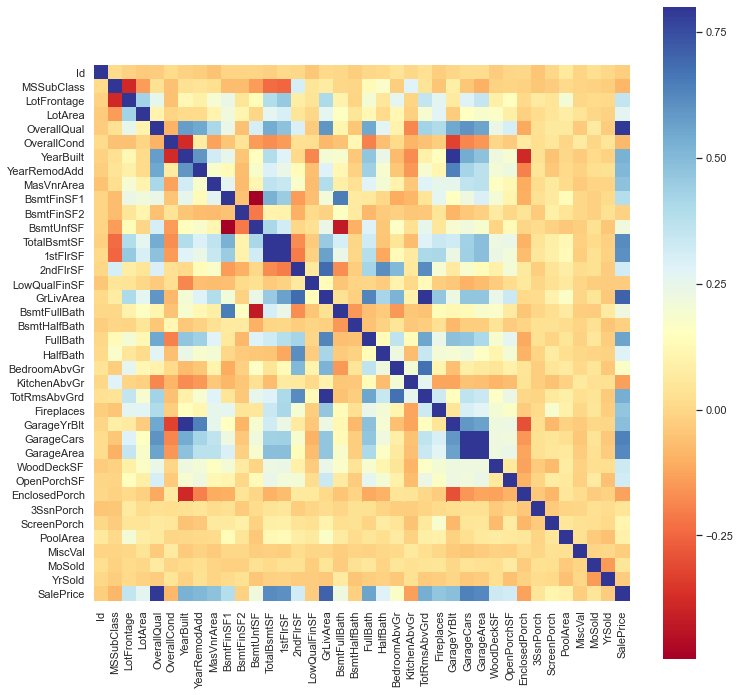

In [12]:
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax  = plt.subplots(figsize= (12, 12))
sns.heatmap(corr_matrix, vmax = .8, square=True, cmap="RdYlBu")

####  Top 10 positively corelated features with 'SalePrice'

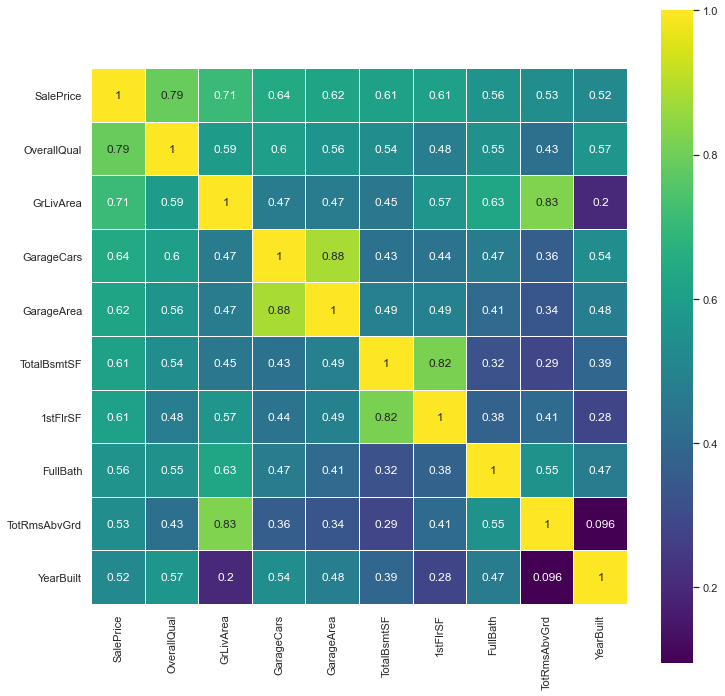

In [13]:
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (12,12))
hmm = sns.heatmap(cm,linewidths=0.01, annot=True, cmap = 'viridis', annot_kws={'size': 12}, square=True, 
                xticklabels=cols.values, yticklabels = cols.values)
plt.show()

#### Observations
1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However we know that the number of cars that fit into the garage is a consequence of the garage area.Therefore, we just need one of these variables in our analysis. We can keep 'GarageCars' since its correlation with 'SalePrice' is higher.


####  Top 10 negatively correlated features with 'SalePrice'

Index(['SalePrice', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass',
       'OverallCond', 'YrSold', 'LowQualFinSF', 'Id', 'MiscVal',
       'BsmtHalfBath', 'BsmtFinSF2'],
      dtype='object')


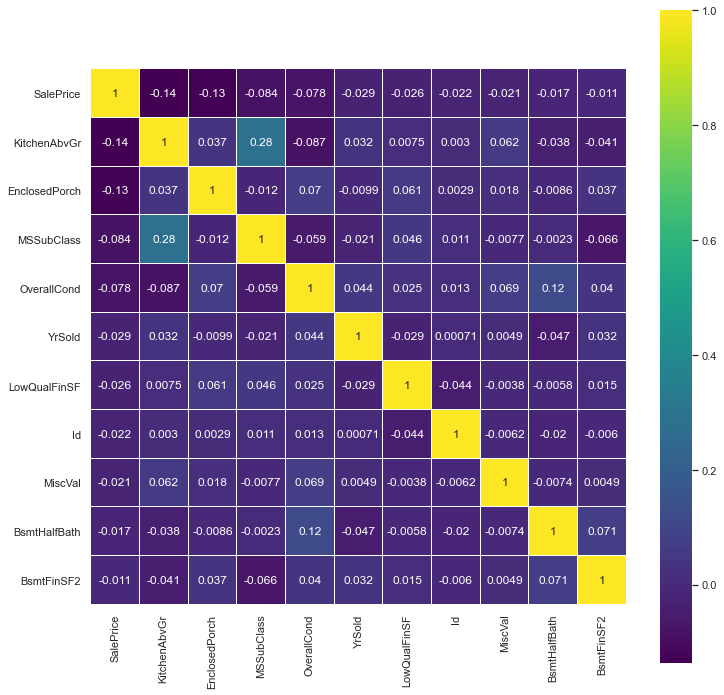

In [14]:
k = 10
cols = corr_matrix.nlargest(1,'SalePrice')['SalePrice'].append(
    corr_matrix.nsmallest(k,'SalePrice')['SalePrice'])
cols_index = cols.index
print(cols_index)
cm = np.corrcoef(train[cols_index].values.T)
f , ax = plt.subplots(figsize = (12,12))
hmm = sns.heatmap(cm,linewidths=0.01, annot=True, cmap = 'viridis', annot_kws={'size': 12}, square=True, 
                xticklabels=cols_index.values, yticklabels = cols_index.values)
plt.show()

In [15]:
attrs = corr_matrix.iloc[:-1,:-1] # all except target
threshold = 0.5

important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) for key in important_corrs])), 
    columns=['Feature_Pair', 'Corr'])

# sorted by absolute value
imp_corr = unique_important_corrs.iloc[abs(unique_important_corrs['Corr']).argsort()[::-1]]

imp_corr


Feature_Pair      Corr
8       (GarageArea, GarageCars)  0.882475
12      (GarageYrBlt, YearBuilt)  0.825667
25     (GrLivArea, TotRmsAbvGrd)  0.825489
1        (1stFlrSF, TotalBsmtSF)  0.819530
17         (2ndFlrSF, GrLivArea)  0.687501
11  (BedroomAbvGr, TotRmsAbvGrd)  0.676620
22    (BsmtFinSF1, BsmtFullBath)  0.649212
2    (GarageYrBlt, YearRemodAdd)  0.642277
20         (FullBath, GrLivArea)  0.630012
5       (2ndFlrSF, TotRmsAbvGrd)  0.616423
26          (2ndFlrSF, HalfBath)  0.609707
15     (GarageCars, OverallQual)  0.600671
19      (GrLivArea, OverallQual)  0.593007
24     (YearBuilt, YearRemodAdd)  0.592855
7      (GarageCars, GarageYrBlt)  0.588920
21      (OverallQual, YearBuilt)  0.572323
3          (1stFlrSF, GrLivArea)  0.566024
10     (GarageArea, GarageYrBlt)  0.564567
27     (GarageArea, OverallQual)  0.562022
16      (FullBath, TotRmsAbvGrd)  0.554784
6    (OverallQual, YearRemodAdd)  0.550684
9        (FullBath, OverallQual)  0.550600
18    (GarageYrBlt, OverallQual)  0.547766
0        (GarageCars, YearBuilt)  0.537850
23    (OverallQual, TotalBsmtSF)  0.537808
14     (BsmtFinSF1, TotalBsmtSF)  0.522396
13     (BedroomAbvGr, GrLivArea)  0.521270
4       (2ndFlrSF, BedroomAbvGr)  0.502901

#### Here we are trying to show the multicollinearity. In regression, multicollinearity refers to features that are coorelated with other features. Multicollonearity occurs when your model includes multiple factors that are coorrelated to each other as well and not just to your target variable.

Problem:
Multicollinearity increases the standard errors of the cooefficients. That means, multicollinearity makes some variables statistically insignificant when they should be significant.

To Avoid:
1. Completely remove those variables
2. Make new features by adding them or by some other operation.
3. Use PCA, which will reduce feature set to small number of non-collinear features.

In [16]:
#coorelation with our target Variable - SalePrice
corr_matrix['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

#####  As we saw there are few feature which shows high multicollinearity from heatmap.

Our Main focus will be:

1. SalePrice and OverallQual
2. GarageArea and GarageCars
3. TotalBsmtSF and 1stFlrSF
4. GrLiveArea and TotRmsAbvGrd
5. YearBulit and GarageYrBlt


We have to create a single feature or remove one of them before we use them as predictors.


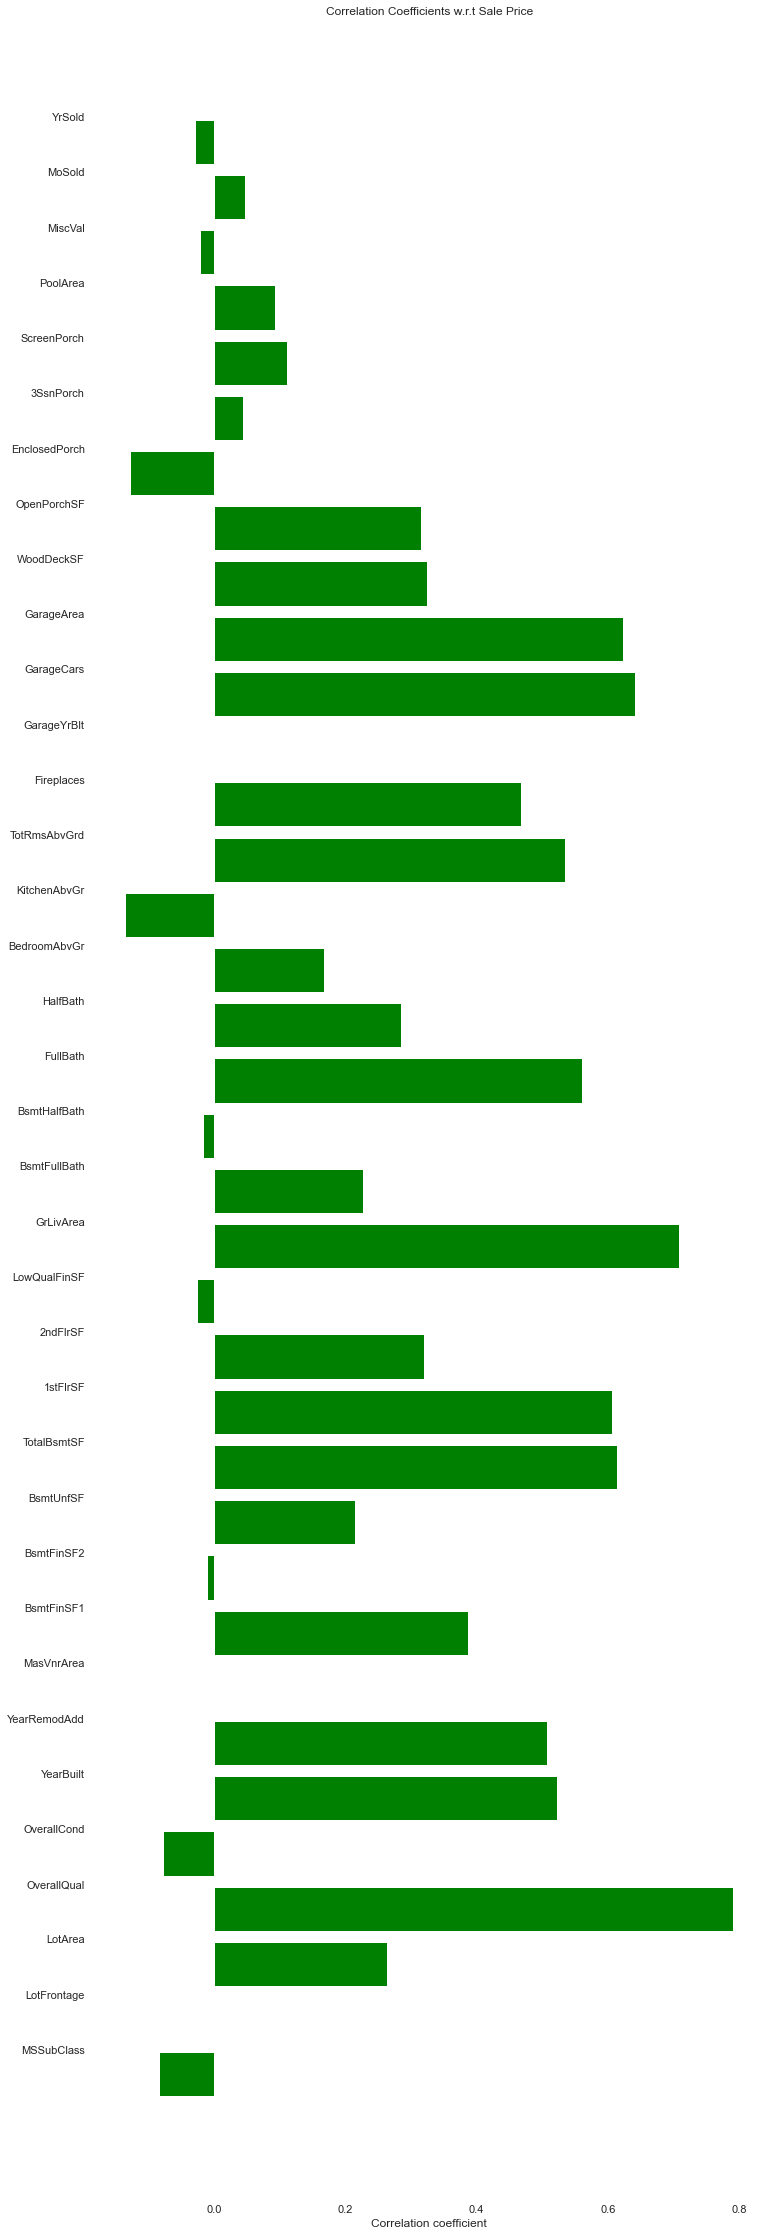

In [17]:
num_feat = train.columns[train.dtypes != object]
num_feat = num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.SalePrice.values)[0,1])
    
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='green')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

#### Observations from Correlation plot
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbcGrd, YearBuilt, YearRemodAdd have positive correlation with SalePrice (> 0.5)

EnclosedPorch and KitchenAbvGr have negative correlation with target Variable

These features can prove to be important features to predict SalePrice.

####  Interesting Plot #2

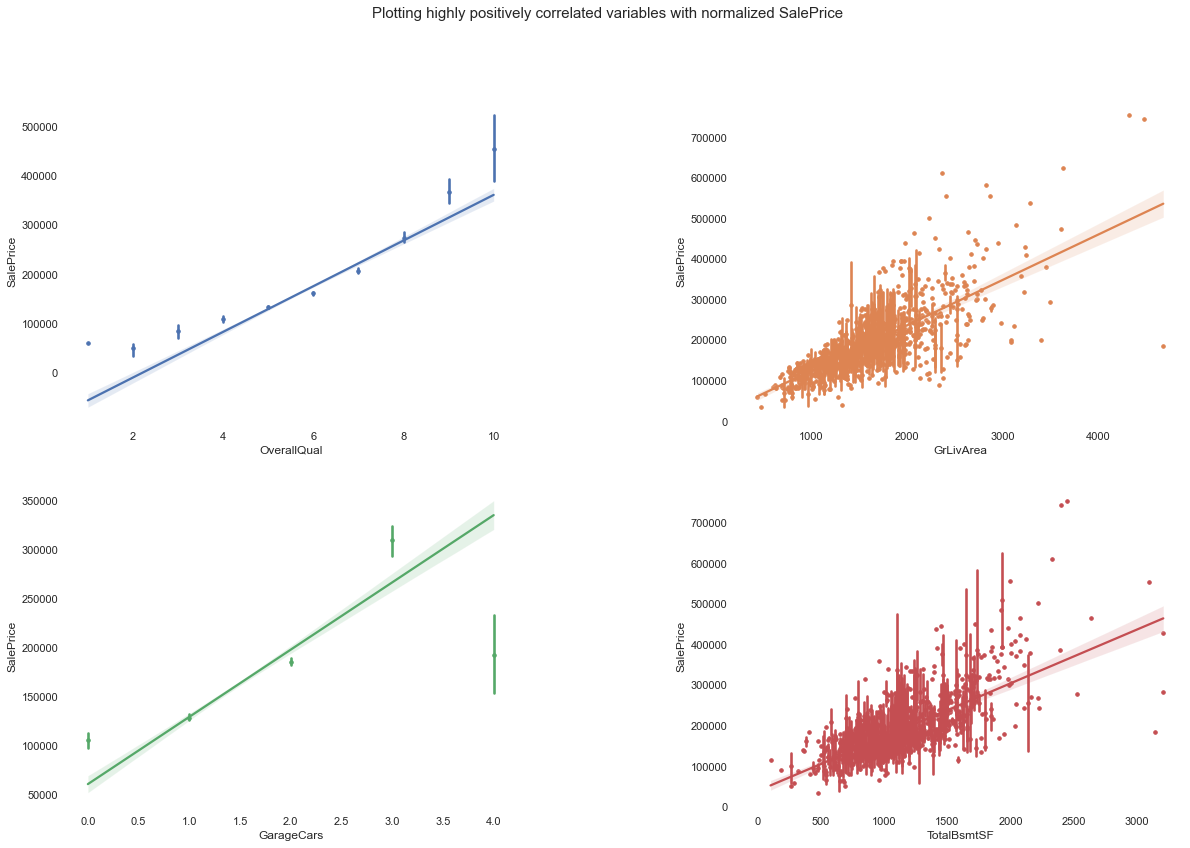

In [18]:
train_scatter = train.copy()
train_scatter = train_scatter.loc[train_scatter['TotalBsmtSF']<3500.0]
train_scatter = train_scatter.loc[train_scatter['TotalBsmtSF']>0.0]

def plot_scatter(features,title):
    fig, (axs,axs1) = plt.subplots(nrows=2, ncols=2, figsize=(20,13))
    fig.subplots_adjust(wspace=0.5)
    for i in range(0,len(features)):
        plot = pd.concat([train_scatter['SalePrice'],train_scatter[features[i]]],axis = 1)
        if i<2 :
            g = sns.regplot(x=features[i],y = 'SalePrice',data = plot,scatter= True,
                      truncate=True,x_estimator=np.mean,marker='.',
                      fit_reg=True,ax=axs[i])
        else:
            g = sns.regplot(x=features[i],y = 'SalePrice',data = plot,scatter= True,
                      truncate=True,x_estimator=np.mean,marker='.',
                      fit_reg=True,ax=axs1[i-2])
        fig.suptitle("Plotting highly "+title+"ly correlated variables with normalized SalePrice",fontsize="15")
        if title=='negative':
            g.set(xticklabels=feat_labels[features[i]])
  
pos_features =['OverallQual','GrLivArea','GarageCars','TotalBsmtSF']
plot_scatter(pos_features,'positive')

del train_scatter

#### Observations

We plot 4 highly positively correlated features with SalePrice.

1. SalePrice is highly correlated with OverallQual i.e the overall rating of material and finish of the house.
2. It is also natural that SalePrice has high positive correlation with living area and basement area.
3. More the space for GarageCars, more is the SalePrice of the house, we have some instances of houses having too much space and less SalePrice though.

####  Intersting Plots #3

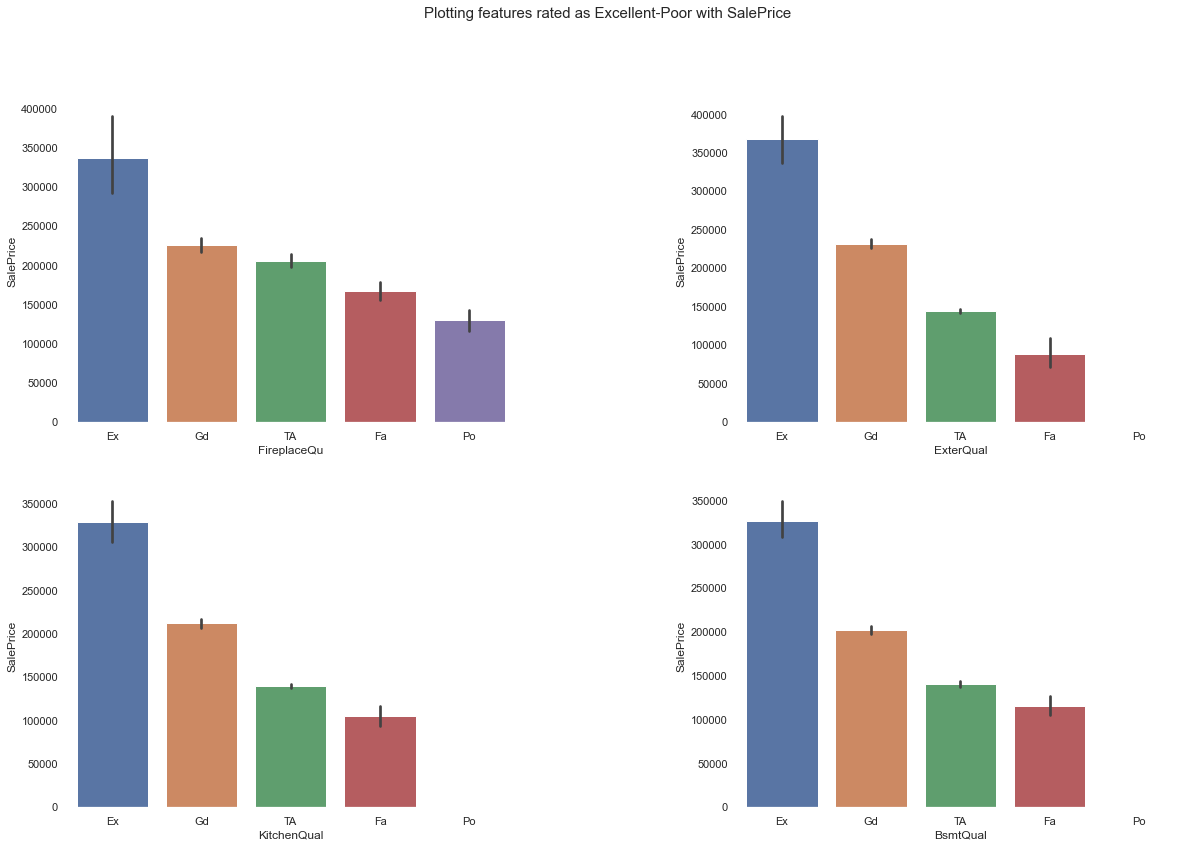

In [19]:
def plot_cat(features):
  fig, (axs,axs1) = plt.subplots(nrows=2, ncols=2, figsize=(20,13))
  fig.subplots_adjust(wspace=0.5)
  for i in range(0,len(features)):
    if i<2 :
      sns.catplot(x=features[i], y="SalePrice",
            data=train,kind="bar",ax=axs[i],order=['Ex','Gd','TA','Fa','Po'])
    else:
      sns.catplot(x=features[i], y="SalePrice",
            data=train,kind="bar",ax=axs1[i-2],order=['Ex','Gd','TA','Fa','Po'])
    fig.suptitle("Plotting features rated as Excellent-Poor with SalePrice",fontsize="15")
    plt.close(2)
house_features = ['FireplaceQu','ExterQual','KitchenQual','BsmtQual']
plot_cat(house_features)

#### Observations

We plot features rated as Excellent, Good, Average, Fair and Poor against SalePrice.

1. We observe these ratings do affect SalePrice a lot and end up being deciding factors on whether the sale price of house will be high or low.

2. Out of the 4 plots, 'FireplaceQu' being of lower quality doesn't punish SalePrice that much as compared to the other 3 features.

#### Interesting Plot 4

<AxesSubplot:xlabel='MoSold'>

([<matplotlib.axis.XTick at 0x1a25cd1510>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

Text(0.5, 0, 'Month Sold')

Text(0, 0.5, 'Median Sale Price')

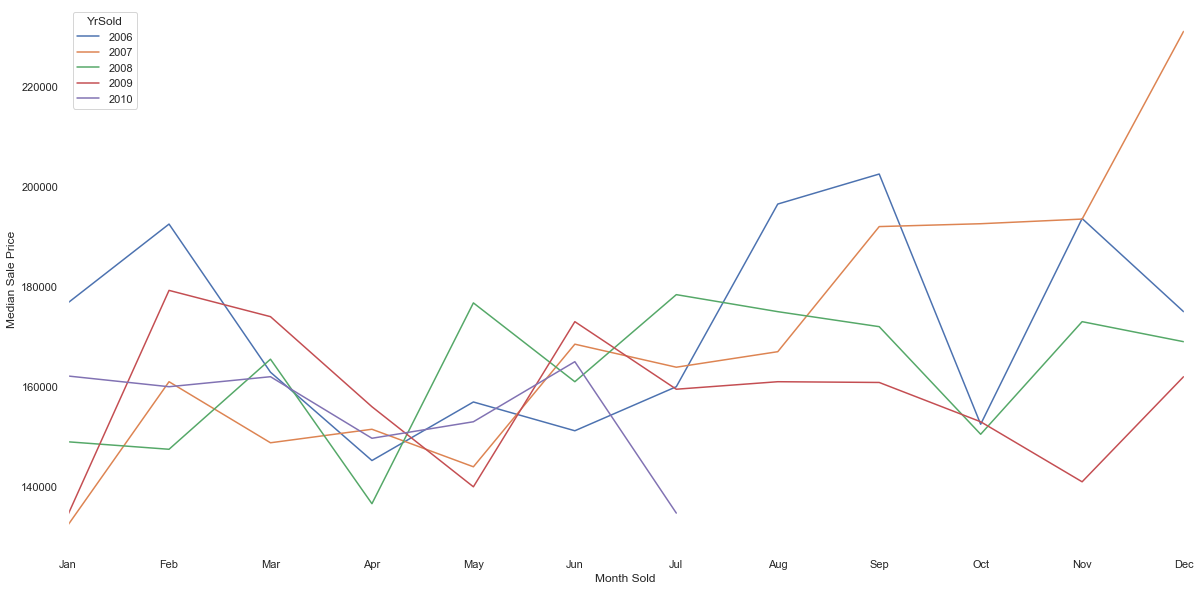

In [20]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots(figsize=(20,10))
train.groupby(['MoSold','YrSold']).median()['SalePrice'].unstack().plot(ax=ax)
plt.xticks(np.arange(1,13),months)
plt.xlabel('Month Sold')
plt.ylabel('Median Sale Price')
plt.show()

####  Observations - Plot 4
We plot median SalePrice per month for every year of sale data.
The major observations we could make from the above plot are:

1. For the year 2007, the median SalePrice is increasing as we move from January to December.
2. Prices are generally lower for the years after 2007, recession might be one of the factors for this trend.
3. Months of April and May seem to be the best months for buying a house as prices seem to drop around that time each year.
4. On the other hand, prices seem to jump up in the months of August and September every year.


#### Now we will see how these features are related to each other, basically the distribution.
 

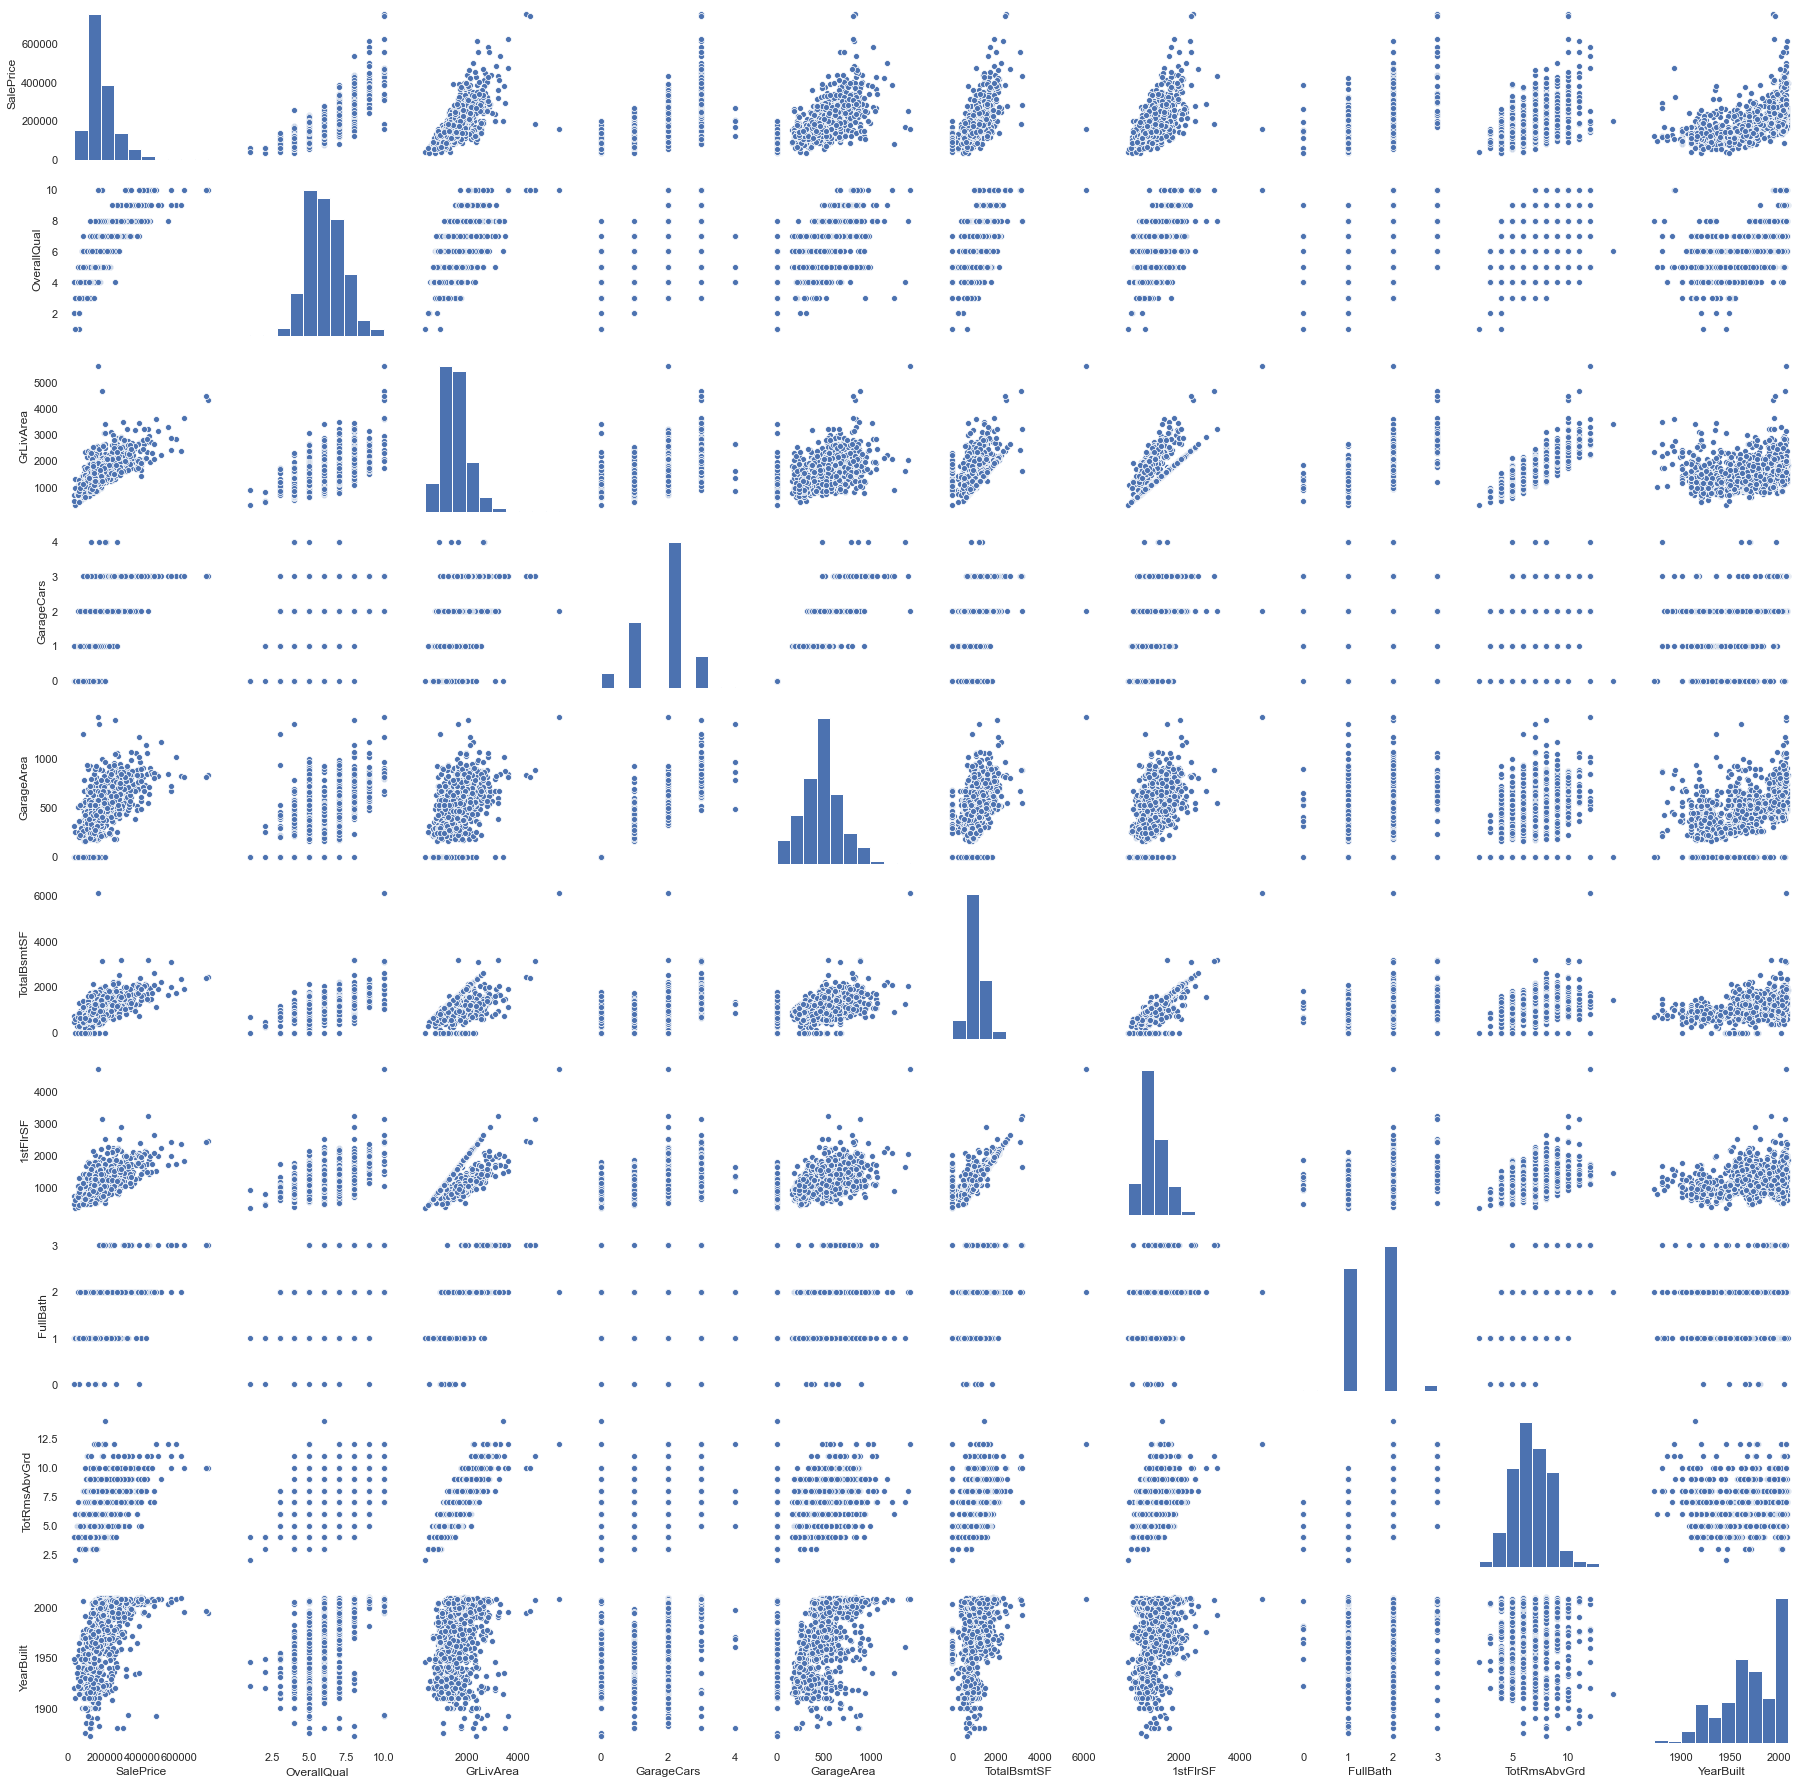

In [21]:
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
sns.pairplot(train[cols], height=2.5)
plt.show()

####  Observations 
1. One of the intersting figure is 'TotalBsmtSF' and 'GrLiveArea'. We can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area
2. The plot  'SalePrice' and 'YearBuilt' is also intersting. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function. We can also see this same tendency in the upper limit of the 'dots cloud'. Also, we noticed how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).


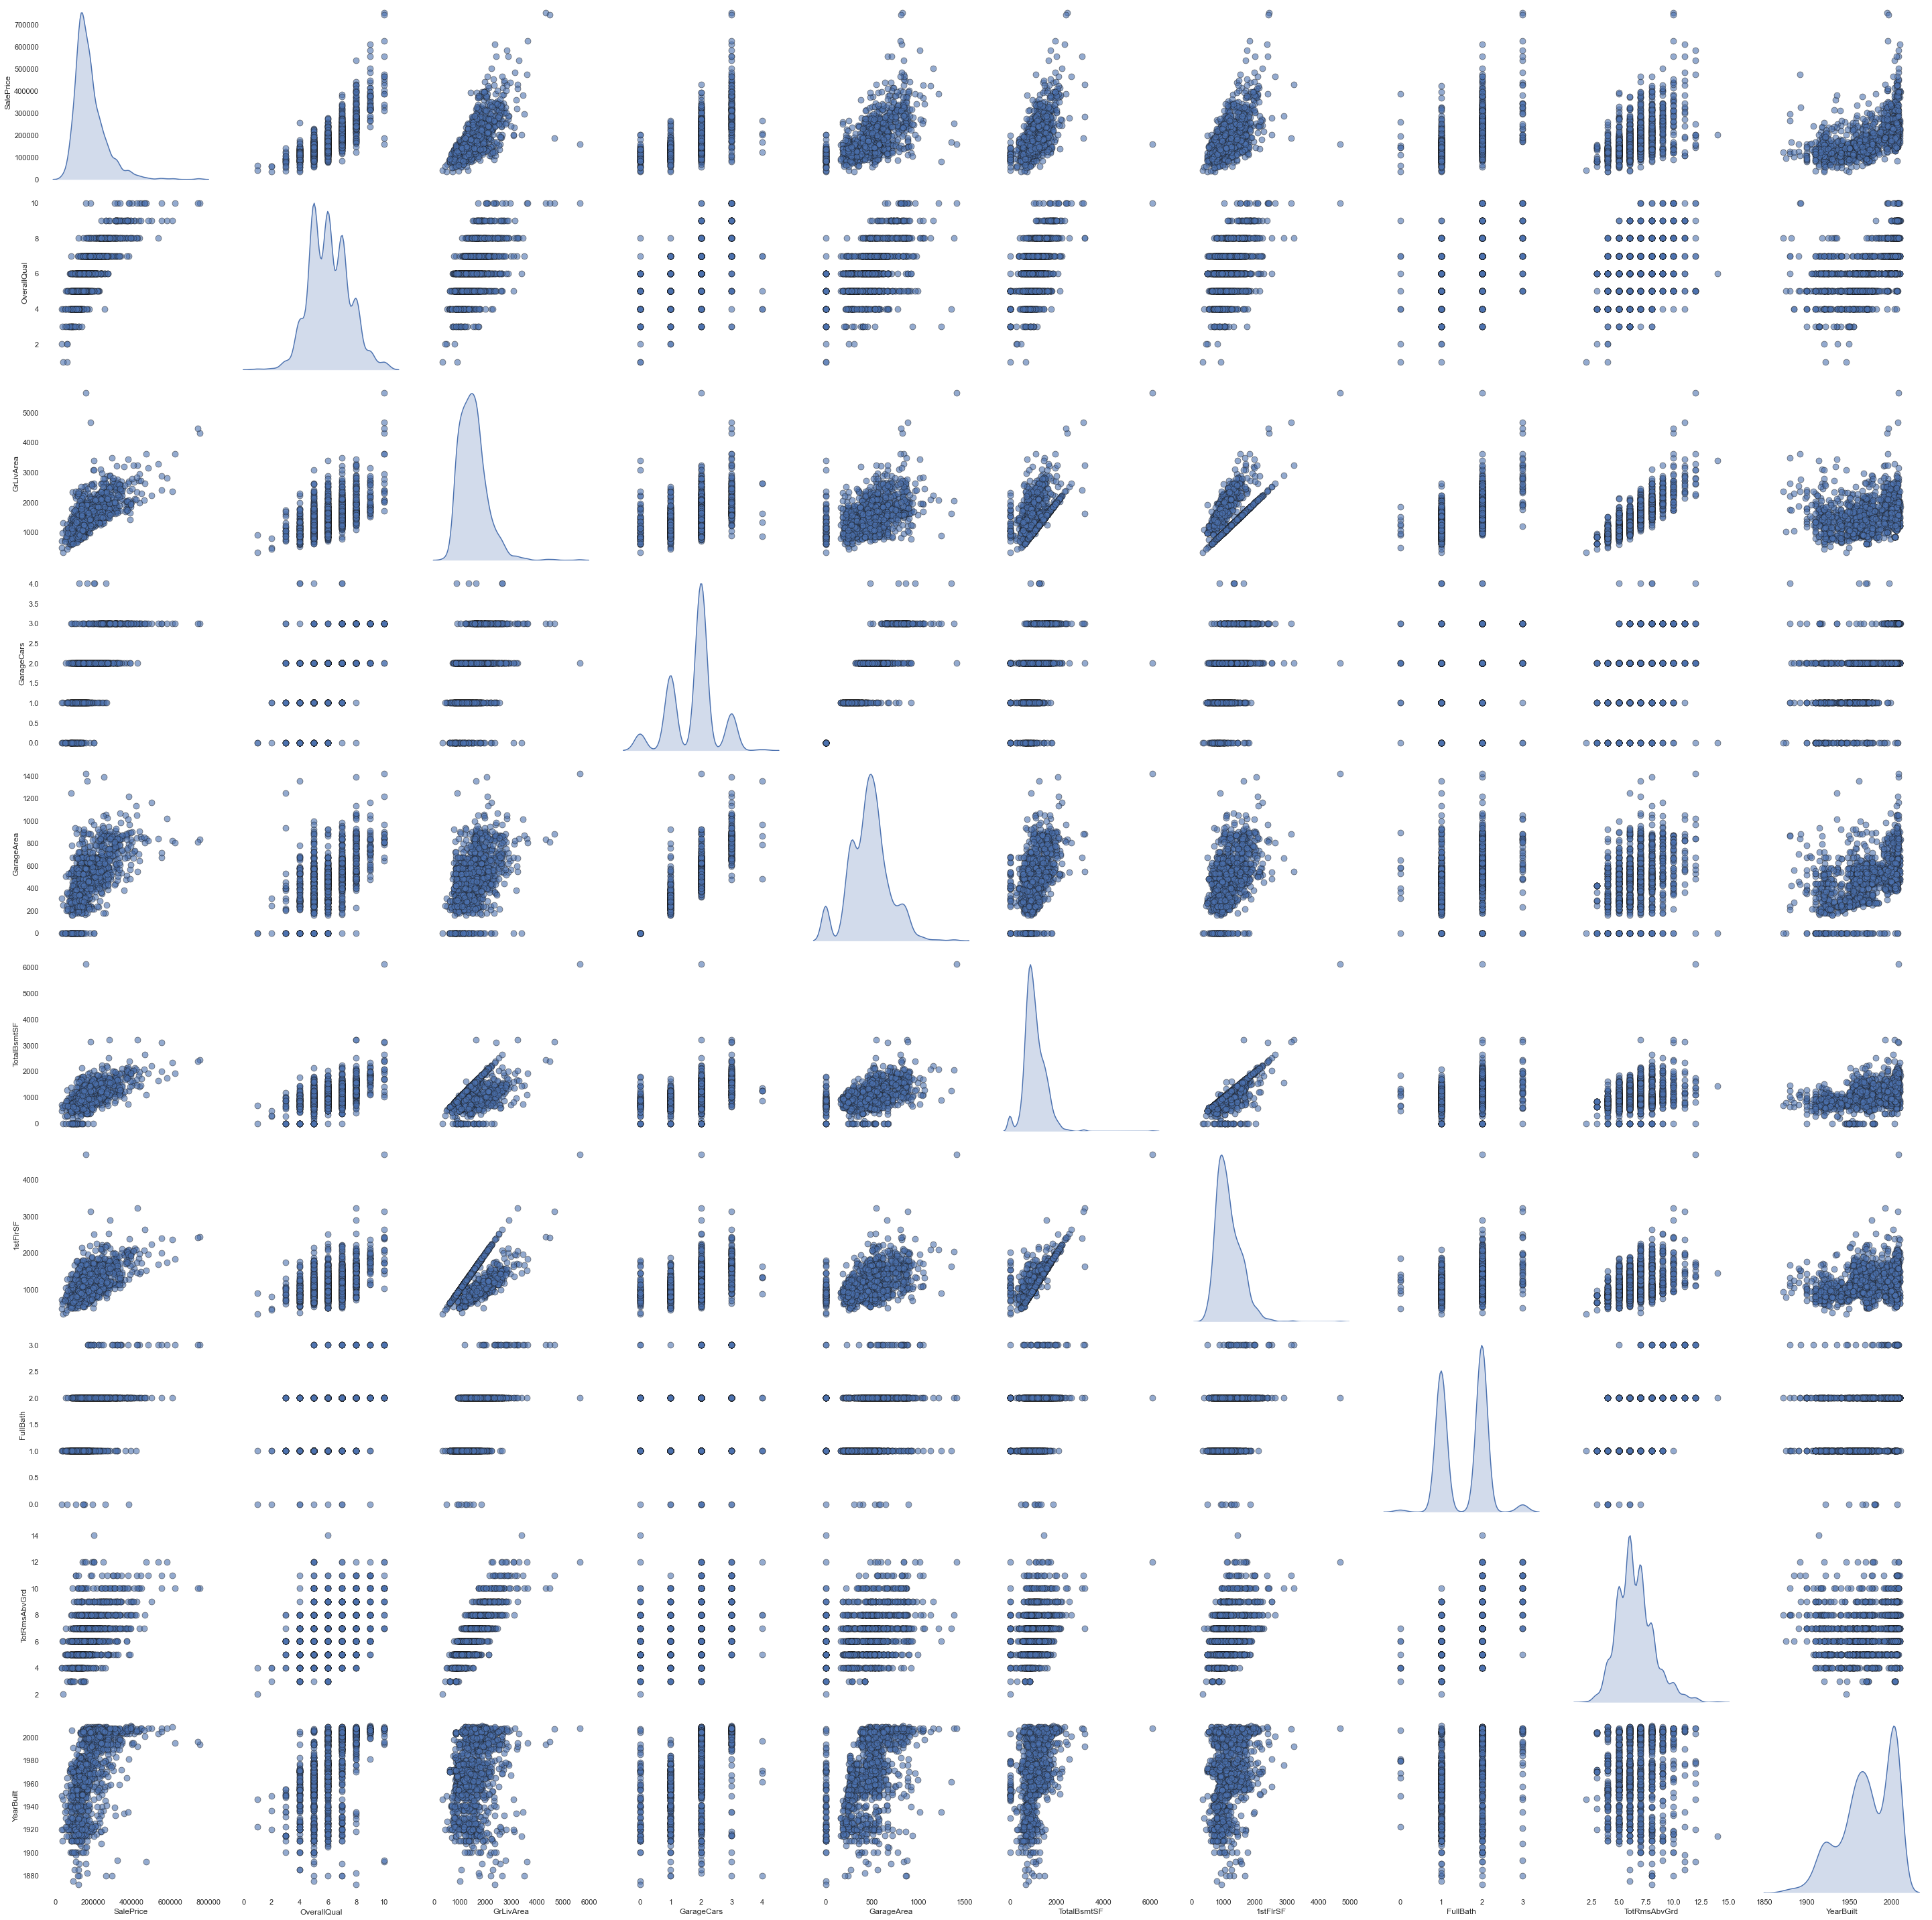

In [22]:
sns.pairplot(train[cols], diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size=4)


### Our Prediction target is : SalesPrice, Now we will look at it more closely

#### Univariate Analysis

How single varaible is distributed in numeric range. What is stastical summary of it. Is it positively skewed or negatively.

In [23]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

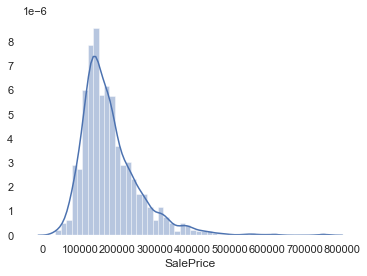

In [24]:
# The density plot of SalePrice
sns.distplot(train['SalePrice'], bins = 50)

#### From Here we can see that Sales Price is
* Deviate from normal distribution
* Is right-skewed  
* shows some peakedness


In [25]:
#Calculating the positive skweness
train['SalePrice'].skew()

1.8828757597682129

In [26]:
train['SalePrice'].kurt()

6.536281860064529

#### In order for the sale price to be normally distributed(more normal), we will Log transform our data

<AxesSubplot:xlabel='SalePrice'>

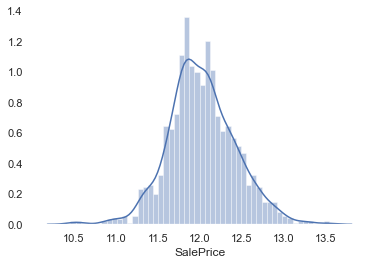

In [27]:
sns.distplot(np.log1p(train.SalePrice), bins = 50)

#### Checking for outliers in Sales Price

<AxesSubplot:xlabel='SalePrice'>

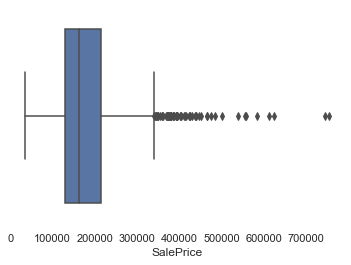

In [28]:
sns.boxplot(train['SalePrice'])

#### Observations
As we can see that there are two outliers here with prices more than 700000

#### GrLivArea 

In [29]:
sale_grlivearea = pd.concat([train["SalePrice"], train["GrLivArea"]], axis =1)

In [30]:
sale_grlivearea.head()

SalePrice  GrLivArea
0     208500       1710
1     181500       1262
2     223500       1786
3     140000       1717
4     250000       2198

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

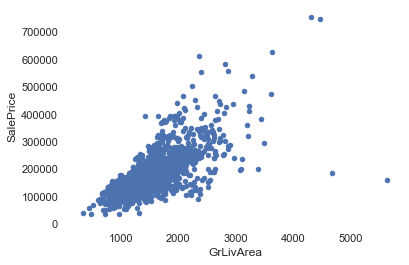

In [31]:
sale_grlivearea.plot.scatter(x ='GrLivArea', y = 'SalePrice')

#### Observations 

1. As we can that there are some outliers in this plot, so we can consider removing these, but we have to be careful as we don't know if test data has outliers as well.

2. At first glance, we see that increases in living area correspond to increases in price.

### Bivariate Analysis

When we try to figure out how 2 parameters in dataset are related to each other. in the sense when one decreases, other also decreases or when one increases other also increases i.e Positive Correlation

And when one increases , other decreases or vice versa i .e Negative correlation.

#### MasVnrArea

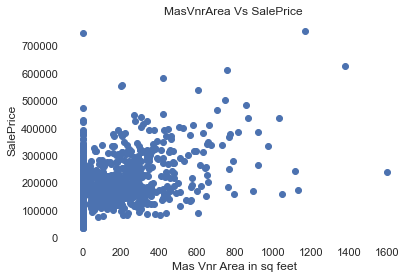

In [32]:
plt.scatter(train["MasVnrArea"],train["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

#### Observations
Few outliers, can be removed

#### MasVnrType

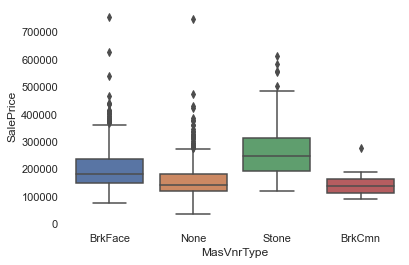

In [33]:
sns.boxplot("MasVnrType","SalePrice",data=train);


#### Observation
1. MasVnrType as strong correlation with 'YearBuilt' and 'OverallQual'which are already considered, so we can remove this variable

#### Electrical

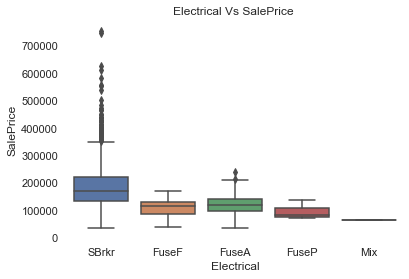

In [34]:
sns.boxplot("Electrical","SalePrice",data=train)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

#### Alley

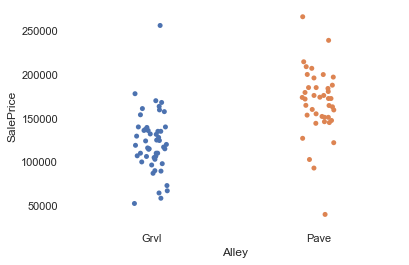

In [35]:
sns.stripplot(x=train["Alley"], y=train["SalePrice"],jitter=True);


#### Observations

All missing value indicate that particular house doesn't have an alley access.we can replace it with 'None'.



#### Basement

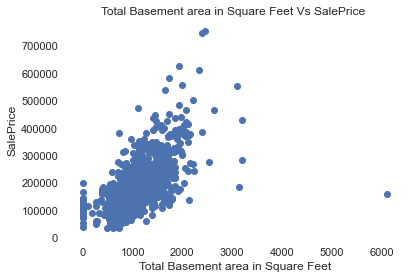

In [36]:
plt.scatter(train["TotalBsmtSF"],train["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

#### Observations

1. There is linear Relationship(possibly exponential) between SalesPrice and TotalBsmtSF
2. There are few outliers in the total basement area, can be removed 
3. We can see that the slope of the linear relationship is particularly high

####  Fireplaces

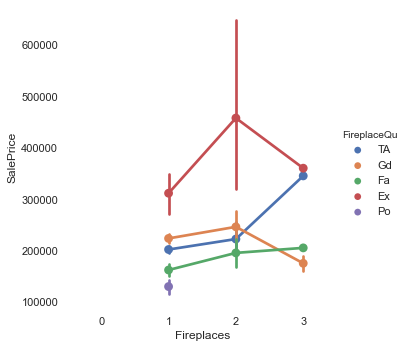

In [37]:
sns.catplot("Fireplaces","SalePrice",data=train,hue="FireplaceQu", kind='point')

#### Observations

Having two fireplaces increases house price and fireplace of Excellent quality is a big plus.

#### GarageArea

<AxesSubplot:xlabel='GarageArea'>

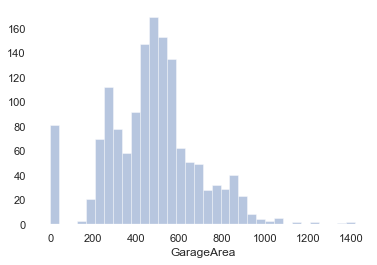

In [38]:
sns.distplot(train["GarageArea"], kde=False)

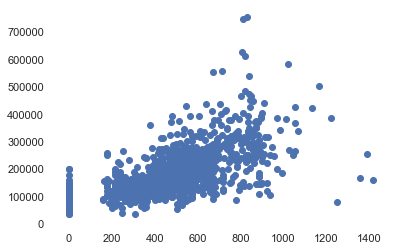

In [39]:
plt.scatter(train["GarageArea"],train["SalePrice"])

#### Observations

1. Notice that there are many homes with 0 for Garage Area, indicating that they don’t have a garage.
2. Garage has some outliers, we can consider removing them.

#### GarageCars

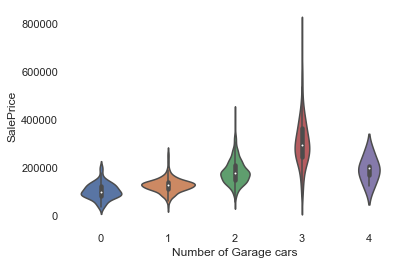

In [40]:
sns.violinplot(train["GarageCars"],train["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars");

#### Obsevations

Its showing the distribution of quantitative data across several levels of one(or more) cateogorical variables such that those distributions can be compared.

1. It can be explained that there is an upper limit on the size of a car, no matter how expensive it is.

#### Pools

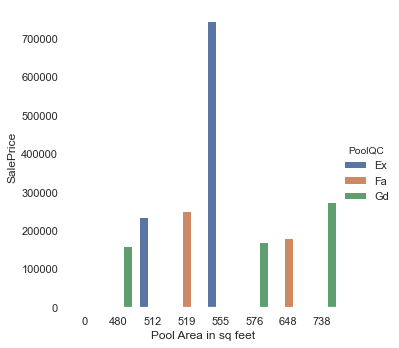

In [41]:
#If PoolArea is 0, that means that house doesn't have a pool.
#train["PoolQC"] = train["PoolQC"].fillna('None')

sns.catplot("PoolArea","SalePrice",data=train,hue="PoolQC",kind='bar')
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");

#### Observations
1. It can be seen that having an excellent pool significantly boosts the median price of the house

#### Fence

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'Type of Fence')

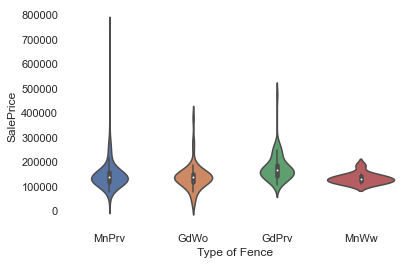

In [42]:
sns.violinplot(train["Fence"], train["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence")

#### Observations

Fence has got 1179 null values. We can safely assume that those houses doesn't have a Fence and replace those values with None.


####  MiscFeature

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'Type of Misc Featues')

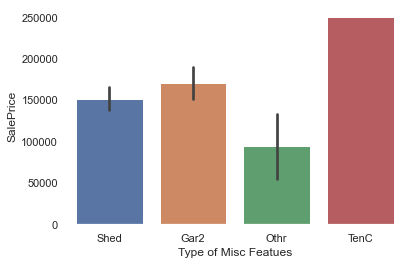

In [43]:
sns.barplot(train['MiscFeature'], train["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Type of Misc Featues")

#### Observations
Some houses don't have miscellaneous features like shed, Tennis court etc..


#### MSZoning

Text(0.5, 1.0, 'MS Zoning')

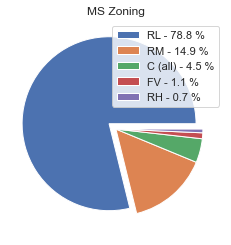

In [44]:
labels =  train['MSZoning'].unique()
explode = [0.1, 0,0,0,0]
mszoning = train['MSZoning'].value_counts().values
percent = 100.*mszoning/mszoning.sum()
labels= ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, percent)]

patches,texts = plt.pie(mszoning, explode= explode)
plt.legend(patches, labels, loc='best')
plt.title("MS Zoning")

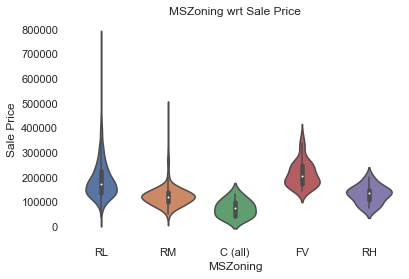

In [45]:
sns.violinplot(train['MSZoning'],train["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

#### Observations
1. The mean SalePrice for category "C(all)" is much lower than for the other categories. And the mean SalePrice for categories "RM" and "RH" is lower than for "RL" and "FV". So, there is a large probability that a House of category "C(all)" has lower SalePrice than one of category "FV"

#### 1stFlrSF - first floor square feet

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, '1st Floor Square Feet')

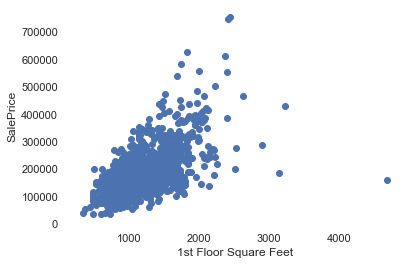

In [46]:
plt.scatter(train["1stFlrSF"], train["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("1st Floor Square Feet")

#### Observations -
1. Positive Coorelation with SalePrice.

#### Sale Price per square foot

(array([  5.,  27.,  96., 157., 264., 336., 279., 161.,  72.,  36.,  16.,
          7.,   2.,   1.,   1.]),
 array([ 28.35873804,  44.88488089,  61.41102375,  77.93716661,
         94.46330947, 110.98945232, 127.51559518, 144.04173804,
        160.5678809 , 177.09402376, 193.62016661, 210.14630947,
        226.67245233, 243.19859519, 259.72473804, 276.2508809 ]),
 <BarContainer object of 15 artists>)

Text(0.5, 0, 'Sale price perr squre foot')

Text(0, 0.5, 'No of Sales')

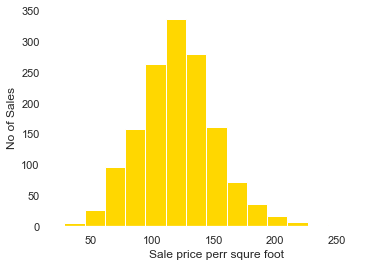

In [47]:
train['SalePriceSF'] = train["SalePrice"] / train["GrLivArea"]
plt.hist(train['SalePriceSF'], bins = 15, color='gold' )
plt.xlabel("Sale price perr squre foot")
plt.ylabel("No of Sales")

In [48]:
#### Average Sale Price per square feet
print("$",train.SalePriceSF.mean())


$ 120.57287807326834


#### Garage Area

Text(0.5, 0, 'Garage area in sq feet')

Text(0, 0.5, 'Sale price')

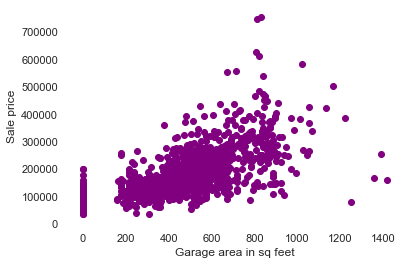

In [49]:
plt.scatter(train["GarageArea"], train["SalePrice"], color='purple')
plt.xlabel("Garage area in sq feet")
plt.ylabel("Sale price")

#### Observation
1. Most of the houses have a garage size from 250 sq.ft. to 1000sq.ft.
2. GarageArea makes Chunk having small lineratiy with SalePrice.

#### YearBuilt - year built

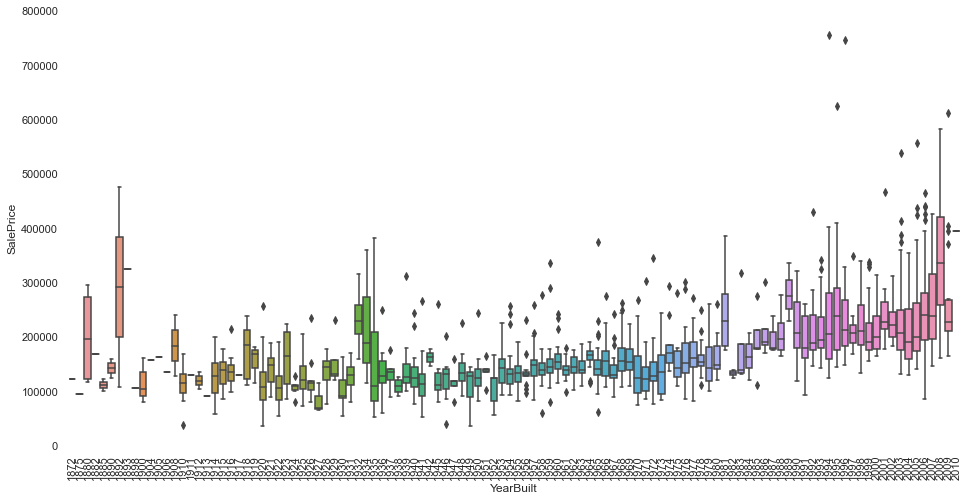

In [50]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### Observations 
1. Although it's not a strong tendency, I'd say that People are more prone to spend more money in new stuff than in old relics.
2. we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.



#### YearRemodAdd


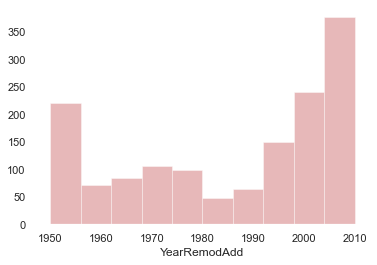

In [51]:
sns.distplot(train["YearRemodAdd"].astype(int),color='r', kde=False);


#### Observations
1. when year is increasing price is also increasing.
2. YearRemodAdd defaults to YearBuilt if there has been no Remodeling/Addition
3. we can use YearRemodeled and YearBuilt to determine the Age.
4. This should be seen as some sort of penalty parameter that indicates that if the Age is based on a remodeling date, it is probably worth less than houses that were built from scratch in that same year.

#### ConstructionAge

In [52]:
train['ConstructionAge'] = train['YrSold'] - train['YearBuilt']

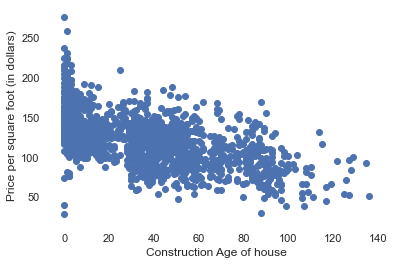

In [53]:
plt.scatter(train['ConstructionAge'], train['SalePriceSF'])
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

#### Observations

Price of house goes down with the age

#### Heating and AC arrangements


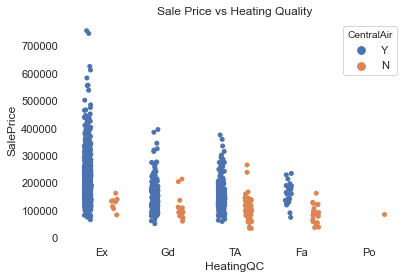

In [54]:
sns.stripplot(x="HeatingQC", y="SalePrice",data=train,hue='CentralAir',jitter=True,dodge=True)
plt.title("Sale Price vs Heating Quality");

####  Observations

Having AC definitely escalates price of house.

#### Kitchen Quality

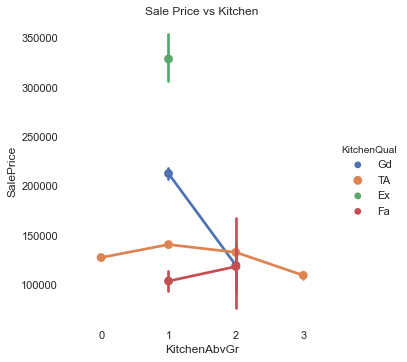

In [55]:
sns.catplot("KitchenAbvGr","SalePrice",data=train,hue="KitchenQual", kind= 'point')
plt.title("Sale Price vs Kitchen");

#### Observations

Having one kitchen of excellent quality hikes the price of the house

#### Overall Quality


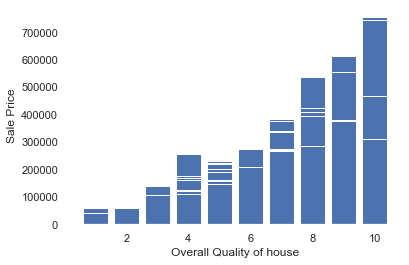

In [56]:
plt.bar(train["OverallQual"],train["SalePrice"])
plt.xlabel("Overall Quality of house")
plt.ylabel("Sale Price");

#### Observations

1. Sales prices increase with the overall quality

#### 2ndFlrSF - 2nd floor sale price 

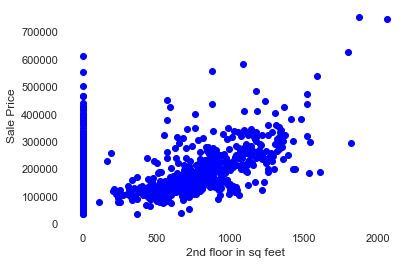

In [57]:
plt.scatter(train["2ndFlrSF"],train["SalePrice"],color="blue")
plt.xlabel("2nd floor in sq feet")
plt.ylabel("Sale Price");

#### observations

1. 2ndFlrSF depressed the power of GrLivarea toward SalePrice


#### Street

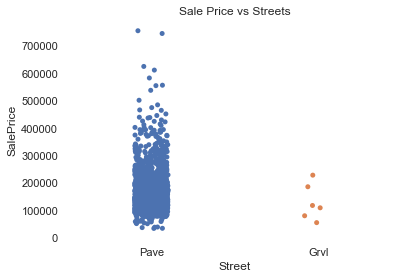

In [58]:
#most streets are paved lets visulalize it
sns.stripplot(x=train["Street"], y=train["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");

#### Observations

1. Large spread of prices on houses that are on paved streets since paved streets is the most suitable to construct upon and offers sturdy foundations, especially for homes of larger sizes. Thus, the pricier homes are almost exclusively found on Paved streets

#### Neighbourhood

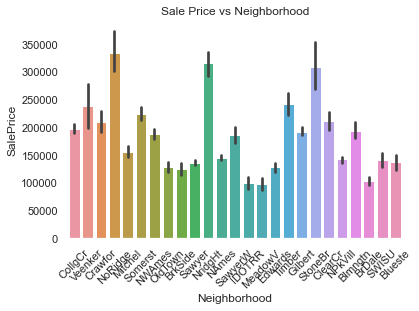

In [59]:
plt.xticks(rotation=45) 
sns.barplot(train["Neighborhood"],train["SalePrice"])
plt.title("Sale Price vs Neighborhood");

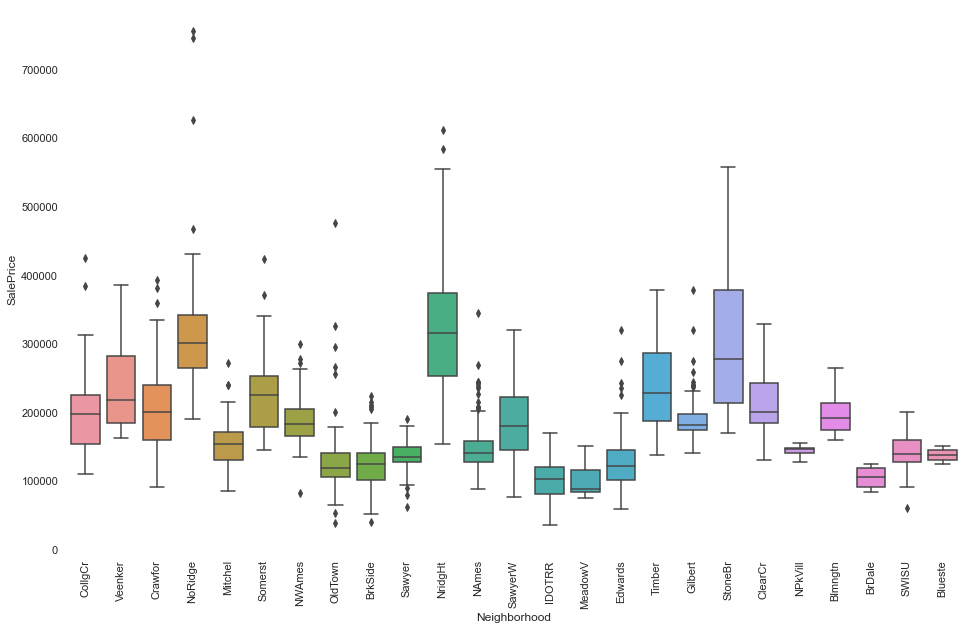

In [60]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
#plt.xticks(np.arange(0,24),feat_labels['Neighborhood'].classes_)
xt = plt.xticks(rotation=90)

#### Observations
We plot 'SalePrice' against 'Neighborhood' .
From this, we can actually find cheap and expensive neighborhoods.

1. Some expensive neighbourhoods are 'NoRidge', 'NridgHt' and 'StoneBr'.
2. NridgHt has a signficantly large range in the sale price of the houses.
3. Some cheap neigbourhoods are 'MeadowV', 'OldTown' and 'BrDale'.

#### SaleType

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

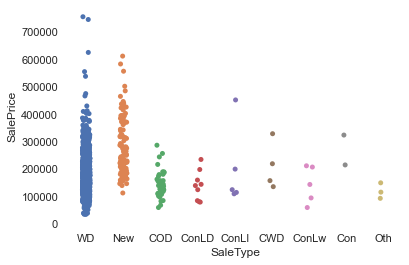

In [61]:
#plt.barh(train["SaleType"],train["SalePrice"])
sns.stripplot(x=train["SaleType"], y=train["SalePrice"],jitter=True)


#### Observation

1. Warranty Deed(WD) sales are extremely popular at all prices, followed by new homes, which have a higher price as is intuitive.

## Data preprocessing and Feature Engneering

#### Overview

* Treating Outliers
* Treating Missing Values in numerical and categorical features
* we will remove skewenes of numeric features is exists
* We will remove skewenes from target feature
* And we will do feature selection

#### Now we will check for missing data/ Nan Values, Missing Value Imputation#### 

In [62]:
percentage_nan_total = train.isna().sum()/train.shape[0]
total =  train.isnull().sum()
missing_data = pd.concat([total, percentage_nan_total], axis=1, keys= ['Total', 'Percent'])


In [63]:
missing_data[missing_data['Percent'] > 0.0].sort_values(ascending=False, by='Percent')

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Features with Null Values')

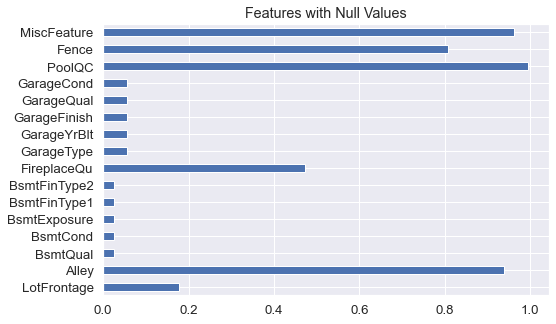

In [64]:
plt.figure(figsize=(8, 5))
sns.set(font_scale= 1.2)
percentage_nan_total[percentage_nan_total > 0.01].plot(kind= "barh")
plt.title("Features with Null Values")

In [65]:
# Visualizing the percentage of missing values
for var in train.columns:
    if train[var].isnull().sum()>0:
        print(var, train[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [66]:
# Identifying features with high percentage (80%) of missing information
for var in train.columns:
    if train[var].isnull().mean()>0.80:
        print(var, train[var].unique())

Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'LotFrontage')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'LotFrontage')

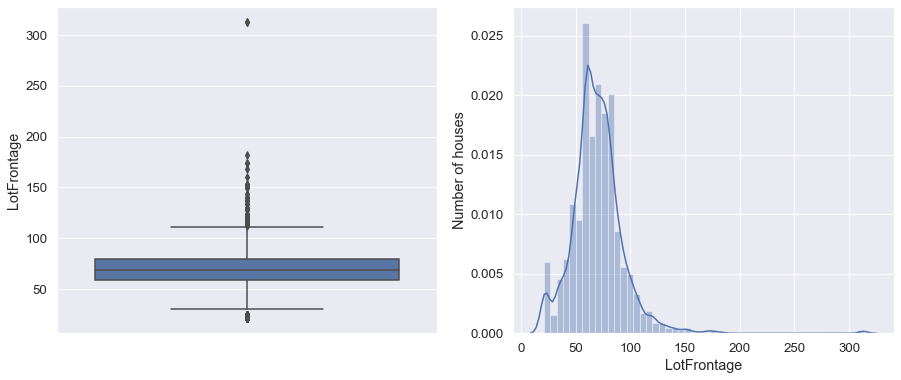

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'LotArea')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'LotArea')

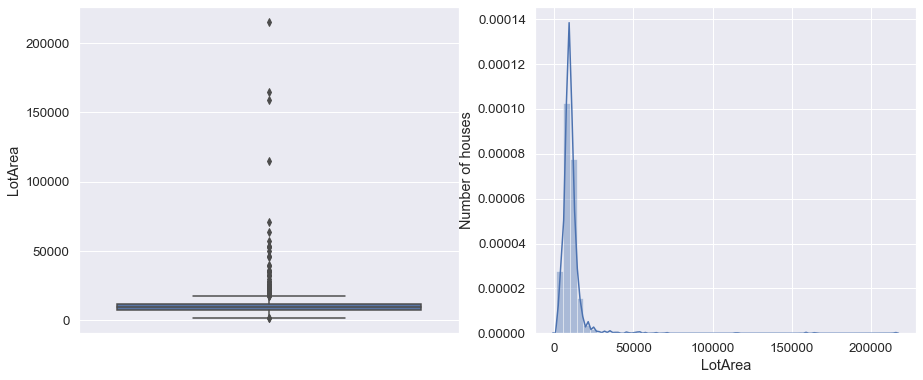

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'YearBuilt')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'YearBuilt')

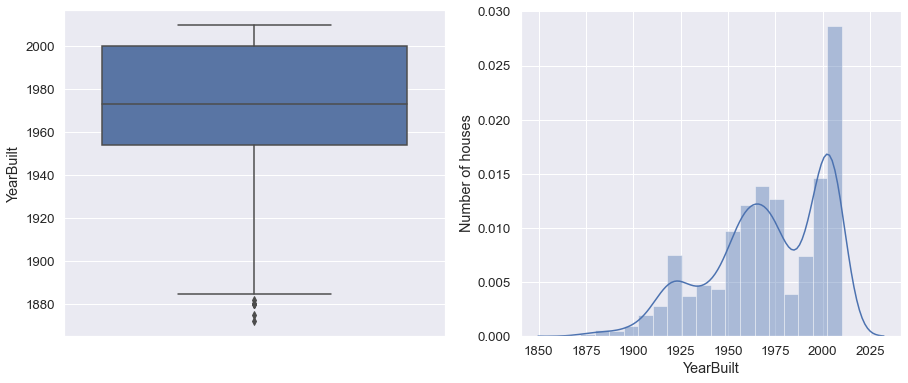

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'YearRemodAdd')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'YearRemodAdd')

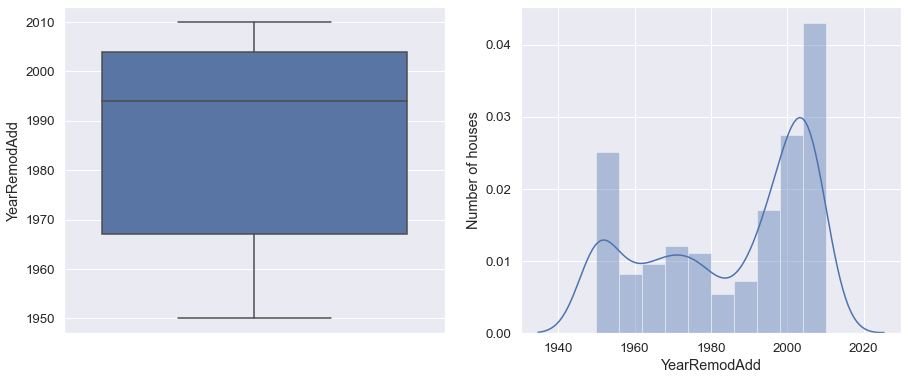

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'MasVnrArea')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'MasVnrArea')

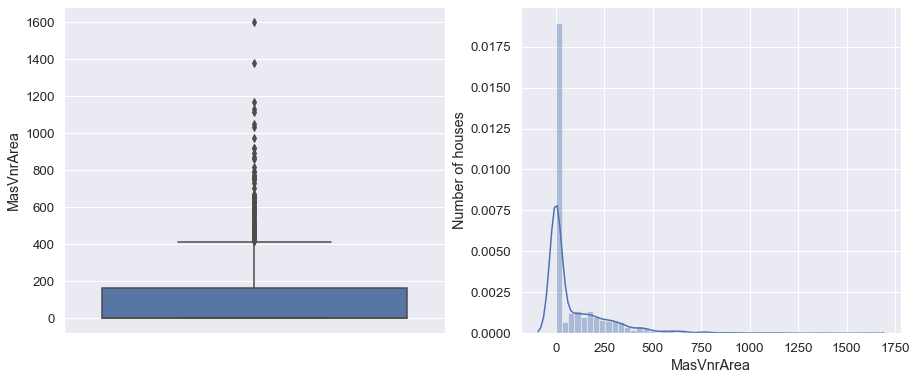

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'BsmtFinSF1')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'BsmtFinSF1')

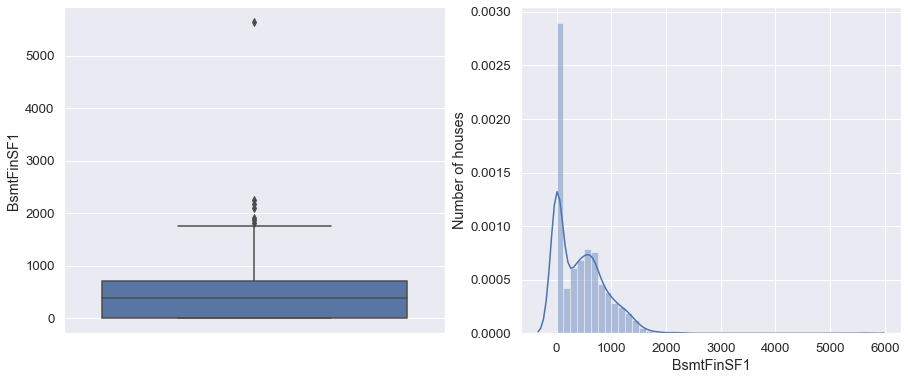

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'BsmtFinSF2')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'BsmtFinSF2')

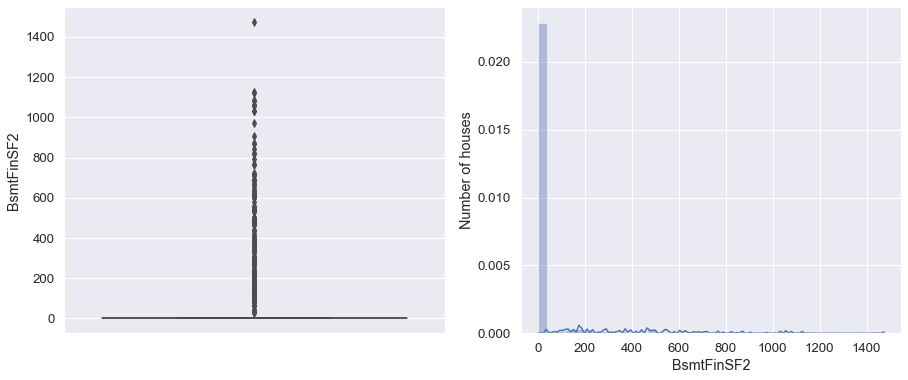

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'BsmtUnfSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'BsmtUnfSF')

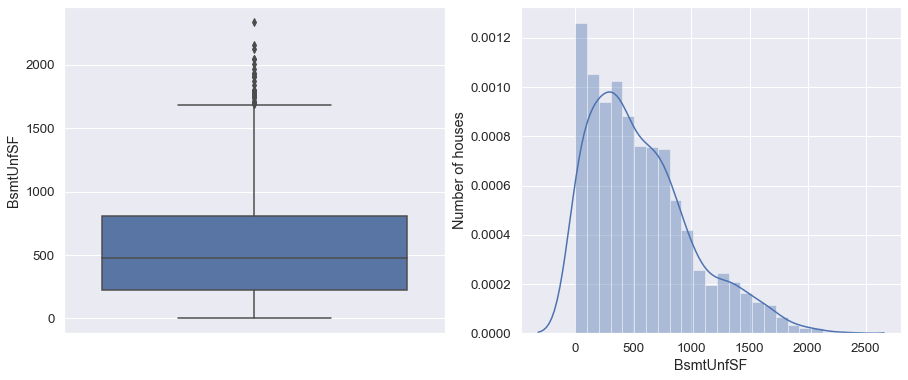

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'TotalBsmtSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'TotalBsmtSF')

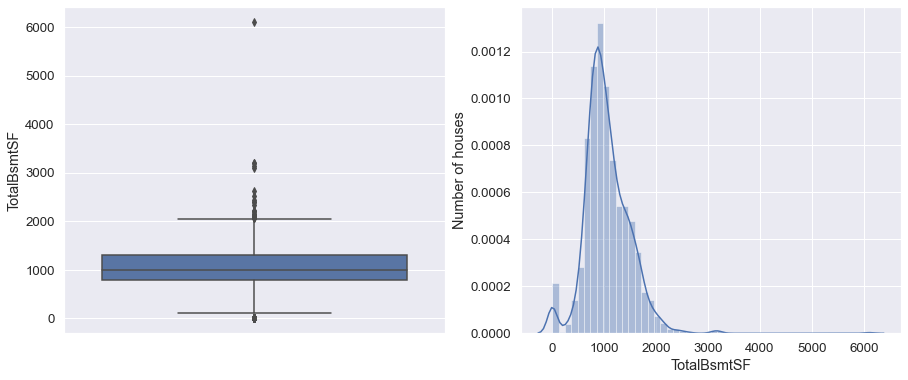

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, '1stFlrSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, '1stFlrSF')

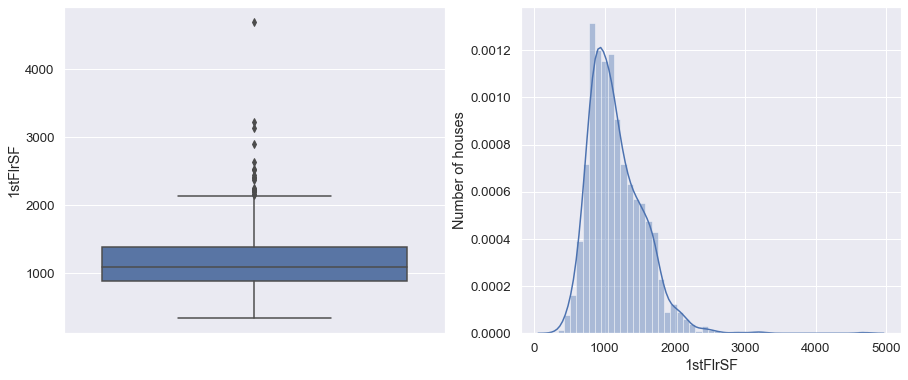

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, '2ndFlrSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, '2ndFlrSF')

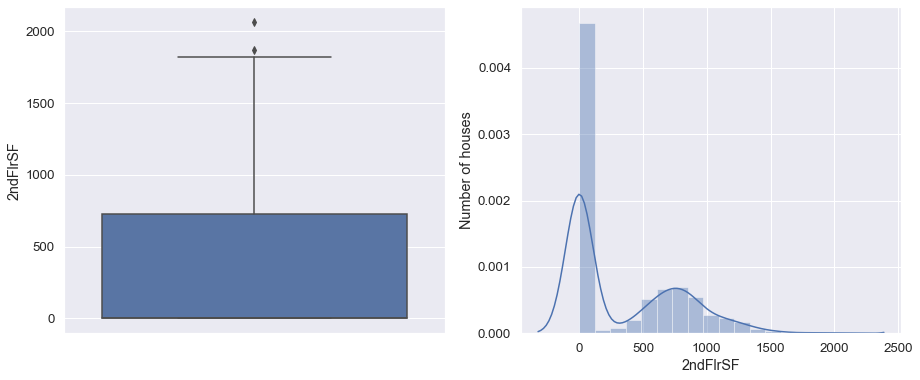

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'LowQualFinSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'LowQualFinSF')

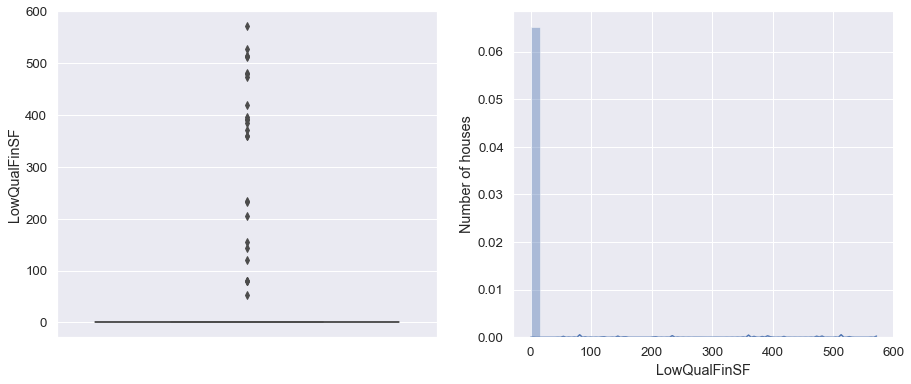

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'GrLivArea')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'GrLivArea')

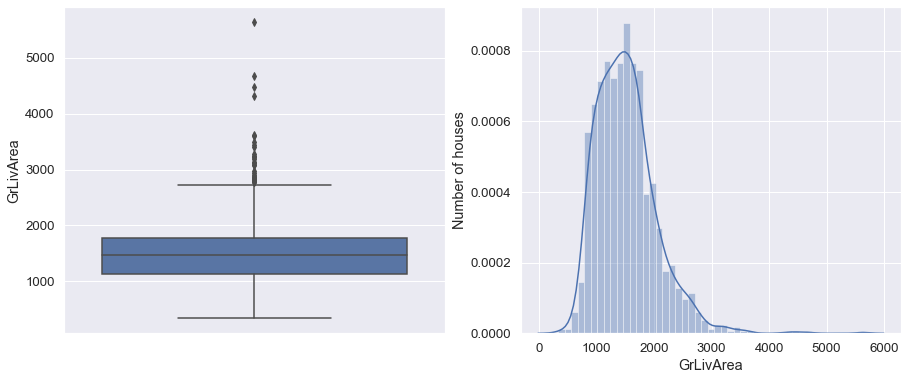

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'GarageYrBlt')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'GarageYrBlt')

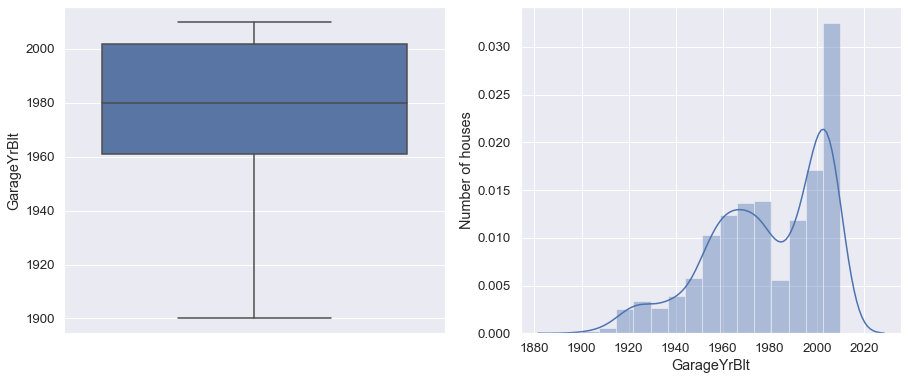

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'GarageArea')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'GarageArea')

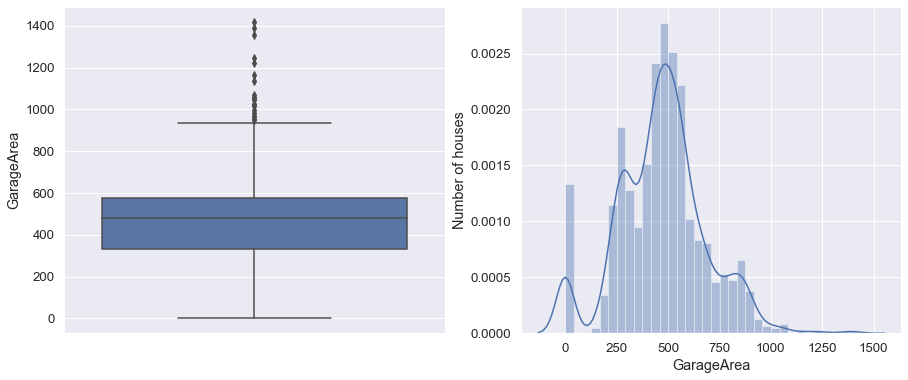

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'WoodDeckSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'WoodDeckSF')

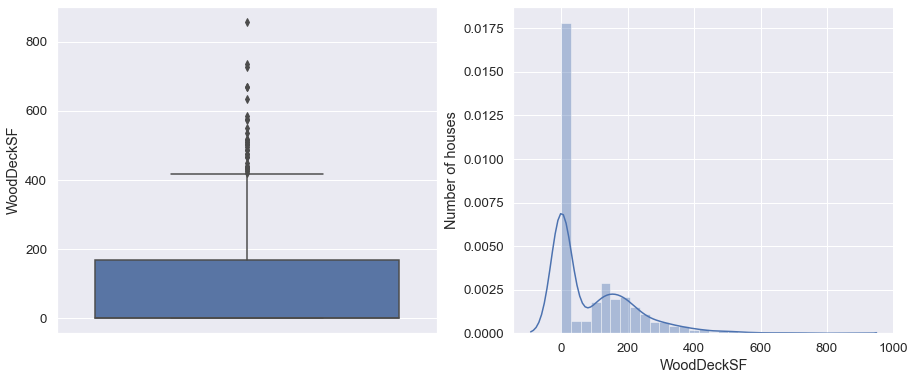

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'OpenPorchSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'OpenPorchSF')

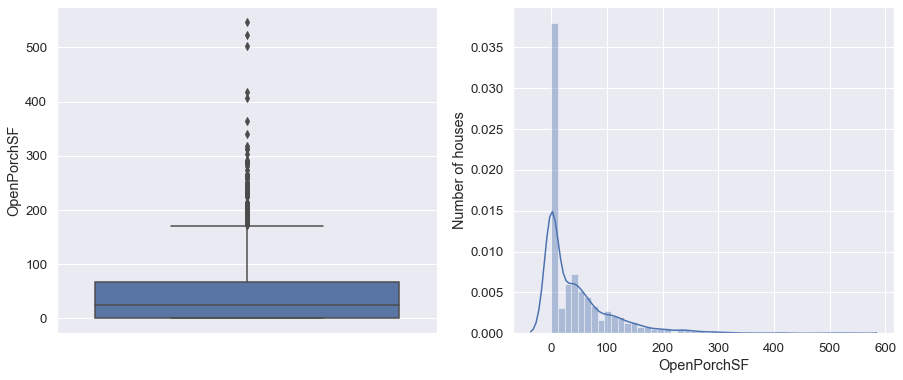

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'EnclosedPorch')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'EnclosedPorch')

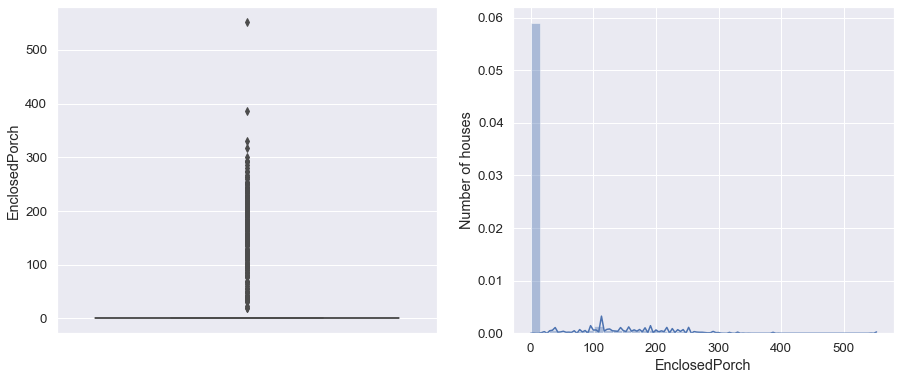

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, '3SsnPorch')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, '3SsnPorch')

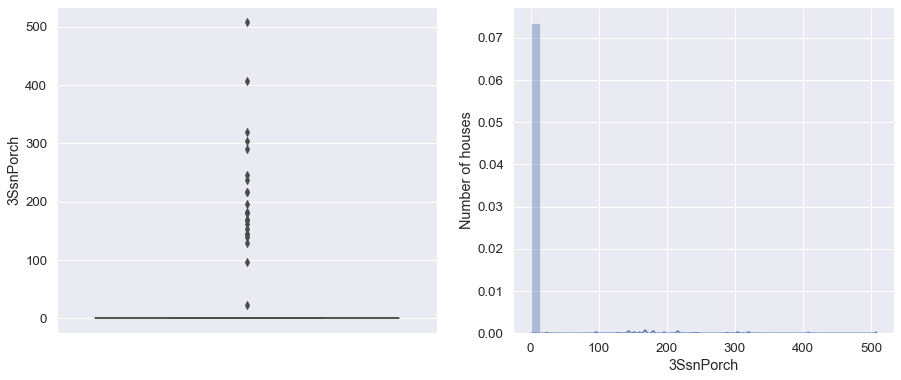

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'ScreenPorch')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'ScreenPorch')

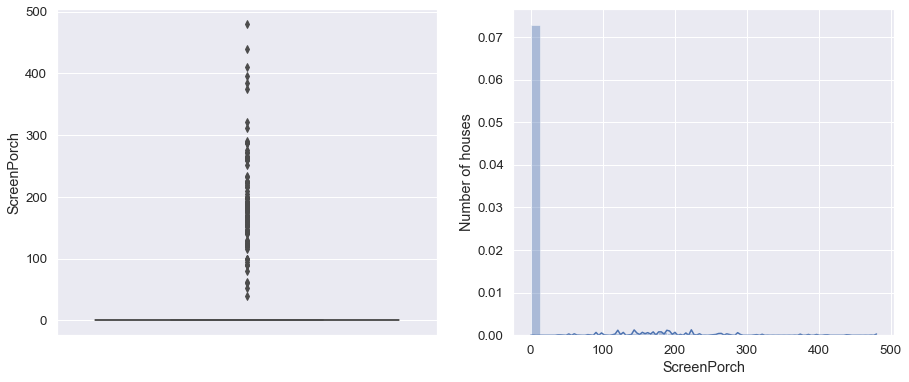

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'MiscVal')

<AxesSubplot:>

Text(0, 0.5, 'Number of houses')

Text(0.5, 0, 'MiscVal')

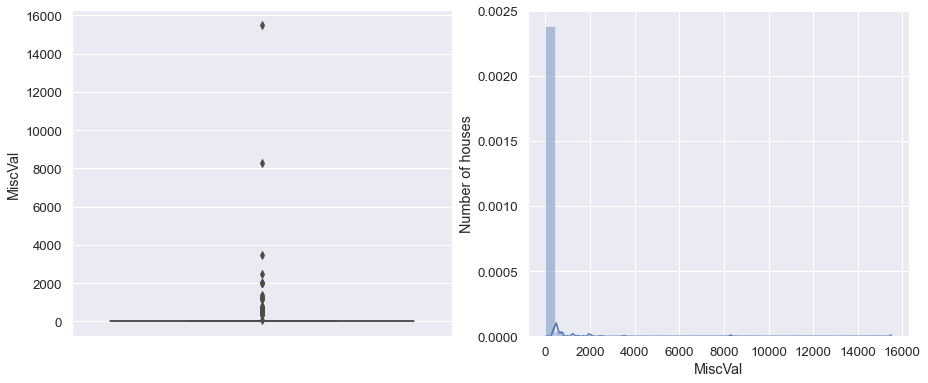

In [67]:
# Making boxplots to visualise outliers in the continuous variables 
# Making histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=train[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(train[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

### Treating Outliers

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'GrLivArea')

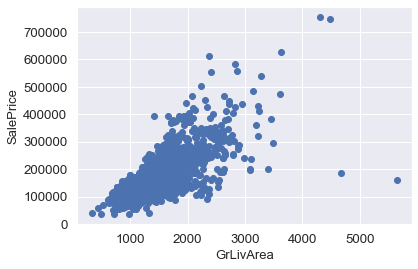

In [68]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'GrLivArea')

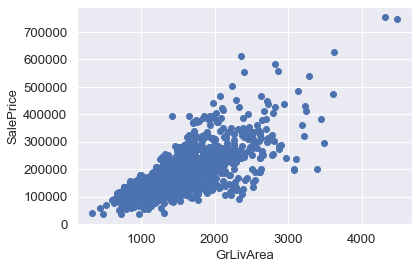

In [69]:
#Deleting exteme outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [70]:
#removing outliers from TotalBsmmtSF
train = train.drop(train[train['TotalBsmtSF']> 6000].index)

In [71]:
# remove outlier for LotFrontage and mean imputation
train = train.drop(train[train['LotFrontage']>150].index)
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [72]:
# Removing outlier for LotArea and transforming
train = train.drop(train[train['LotArea']>50001].index)

In [73]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [74]:
# train and test set split - 80|20
X_train, X_test, y_train, y_test = train_test_split(train, train.SalePrice, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1152, 84), (288, 84))

### Treating Missing values

In [75]:
# Identifying continuous variables with missing data
for col in continuous:
    if X_train[col].isnull().mean()>0: 
        print(col, X_train[col].isnull().mean())

MasVnrArea 0.003472222222222222
GarageYrBlt 0.05555555555555555


In [76]:
# Treating Null values in Continuous variables - add variable indicating missingness + median imputation
for df in [X_train, X_test]:
    for var in ['LotFrontage', 'GarageYrBlt']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
        df[var].fillna(X_train[var].median(), inplace=True) 

for df in [X_train, X_test]:
    df.MasVnrArea.fillna(X_train.MasVnrArea.median(), inplace=True)

In [77]:
print("\nMissing Data in Descrete Variables:")
# print variables with missing data in Descrete Variables
for col in discrete:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())
        
# print variables with missing data in Categorical Variables
print("\nMissing Data in Categorical Variables:")
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())


Missing Data in Descrete Variables:

Missing Data in Categorical Variables:
Alley 0.9340277777777778
MasVnrType 0.003472222222222222
BsmtQual 0.027777777777777776
BsmtCond 0.027777777777777776
BsmtExposure 0.027777777777777776
BsmtFinType1 0.027777777777777776
BsmtFinType2 0.028645833333333332
Electrical 0.0008680555555555555
FireplaceQu 0.4878472222222222
GarageType 0.05555555555555555
GarageFinish 0.05555555555555555
GarageQual 0.05555555555555555
GarageCond 0.05555555555555555
PoolQC 0.9973958333333334
Fence 0.8064236111111112
MiscFeature 0.9618055555555556


In [78]:
# add label indicating 'Missing' to categorical variables
for df in [X_train, X_test]:
    for var in categorical:
        df[var].fillna('Missing', inplace=True)

In [79]:
# check absence of null values
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

for var in X_train.columns:
    if X_test[var].isnull().sum()>0:
        print(var, X_test[var].isnull().sum())
       

### Data Transformation/Feature Engineering - remove skewenes

In [80]:
# TO draw Scatter plot
def getScatterPlot(feature1, feature2):
    scatplotdata = pd.DataFrame({"x":feature1, "y":feature2})
    scatplotdata.plot(x = "x", y = "y", kind = "scatter")
    return()

In [81]:
#To draw and see Distribution and skewness
def getDistSkew(data,feature):
    fig = plt.figure()
    sns.distplot(data[feature], fit=norm);
    return("Skewness : ",skew(data[feature].dropna()))

In [82]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness['var'] = skewness.index
skewness.head(100)


Skew in numerical features: 



Skew              var
MiscVal          24.351335          MiscVal
PoolArea         19.388468         PoolArea
3SsnPorch        10.221094        3SsnPorch
LowQualFinSF      9.203395     LowQualFinSF
KitchenAbvGr      4.448495     KitchenAbvGr
BsmtFinSF2        4.274559       BsmtFinSF2
BsmtHalfBath      4.130683     BsmtHalfBath
ScreenPorch       4.114926      ScreenPorch
EnclosedPorch     2.866635    EnclosedPorch
MasVnrArea        2.706323       MasVnrArea
OpenPorchSF       2.351772      OpenPorchSF
LotArea           2.196930          LotArea
SalePrice         1.758769        SalePrice
WoodDeckSF        1.434097       WoodDeckSF
MSSubClass        1.395040       MSSubClass
GrLivArea         0.914963        GrLivArea
BsmtUnfSF         0.914891        BsmtUnfSF
1stFlrSF          0.898284         1stFlrSF
2ndFlrSF          0.784025         2ndFlrSF
BsmtFinSF1        0.749955       BsmtFinSF1
TotalSF           0.728235          TotalSF
OverallCond       0.687127      OverallCond
HalfBath          0.678710         HalfBath
TotRmsAbvGrd      0.659861     TotRmsAbvGrd
Fireplaces        0.639749       Fireplaces
ConstructionAge   0.606881  ConstructionAge
BsmtFullBath      0.582143     BsmtFullBath
TotalBsmtSF       0.509341      TotalBsmtSF
SalePriceSF       0.401022      SalePriceSF
LotFrontage       0.301979      LotFrontage
BedroomAbvGr      0.244392     BedroomAbvGr
MoSold            0.214153           MoSold
OverallQual       0.199914      OverallQual
GarageArea        0.142606       GarageArea
YrSold            0.090452           YrSold
FullBath          0.039731         FullBath
Id               -0.002677               Id
GarageCars       -0.333815       GarageCars
YearRemodAdd     -0.496287     YearRemodAdd
YearBuilt        -0.611177        YearBuilt
GarageYrBlt      -0.647218      GarageYrBlt

In [83]:
# Doing BoxCox Transformation for Very skewed features

def boxcox_transformation(var):
    X_train[var], param = stats.boxcox(X_train[var]+1) 
    X_test[var], param = stats.boxcox(X_test[var]+1)

for var in continuous:
    if skewness.loc[skewness['var']=='Id']['Skew'].values[0]>0.75:
        boxcox_transformation(var)
    
X_train[continuous].head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
521          90.0    11988       1957          1957         0.0         777   
491          79.0     9490       1941          1950         0.0         403   
1063         50.0     6000       1925          1980         0.0         397   
680          50.0     8012       1980          1980         0.0         543   
1256         91.0    14303       1994          1994       554.0        1314   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
521            0        467         1244      1244         0             0   
491          165        238          806       958       620             0   
1063           0        706         1103      1103         0             0   
680          119        261          923       923         0             0   
1256           0        672         1986      1987         0             0   

      GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
521        1244       1957.0         336           0           40   
491        1578       1941.0         240           0            0   
1063       1103       1976.0         440         166          120   
680         923       1980.0         264          80            0   
1256       1987       1994.0         691         262           36   

      EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
521               0          0            0        0  
491              32          0            0        0  
1063              0          0            0        0  
680               0          0            0        0  
1256              0          0            0        0

In [84]:
# Checking for any INFINITY Values after Transformation
for var in continuous:
    if np.isinf(X_train[var]).sum()>1:
        print(var)
    if np.isinf(X_test[var]).sum()>1:
        print(var)
        
# Checking for any NULL Values after Transformation
for var in X_train.columns:
    if X_test[var].isnull().sum()>0:
        print(var, X_test[var].isnull().sum())

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'LotFrontage')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'LotFrontage')

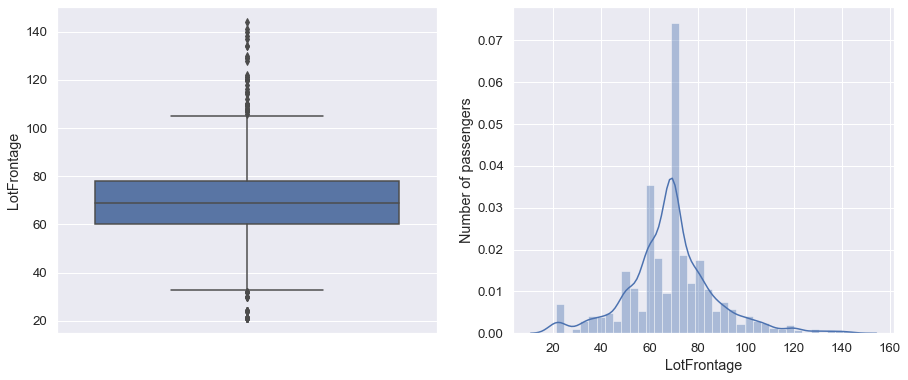

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'LotArea')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'LotArea')

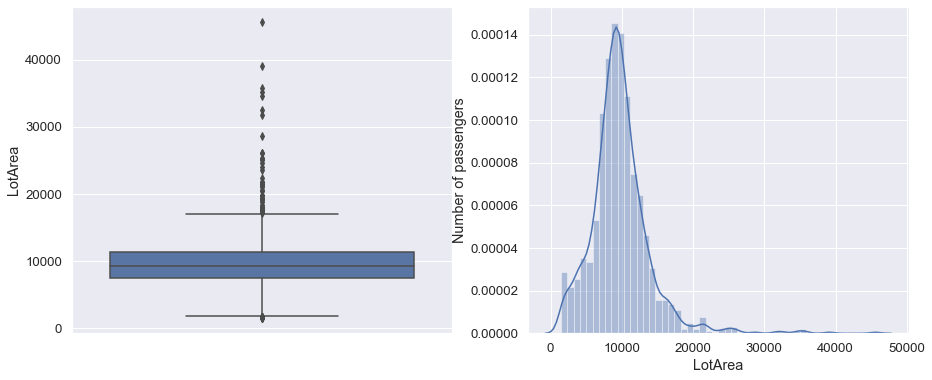

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'YearBuilt')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'YearBuilt')

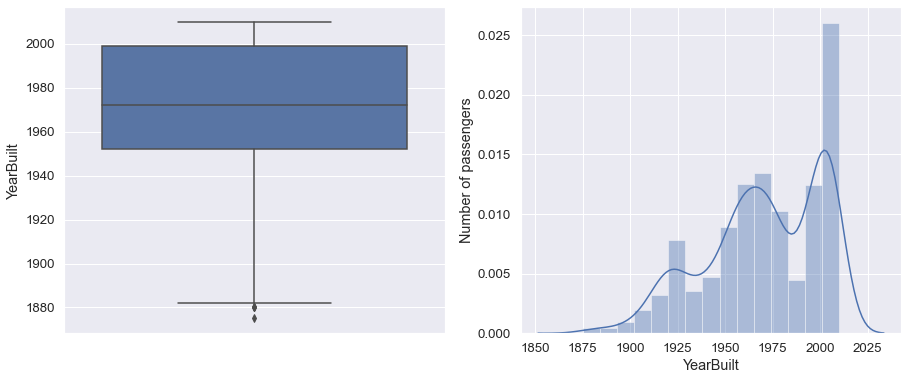

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'YearRemodAdd')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'YearRemodAdd')

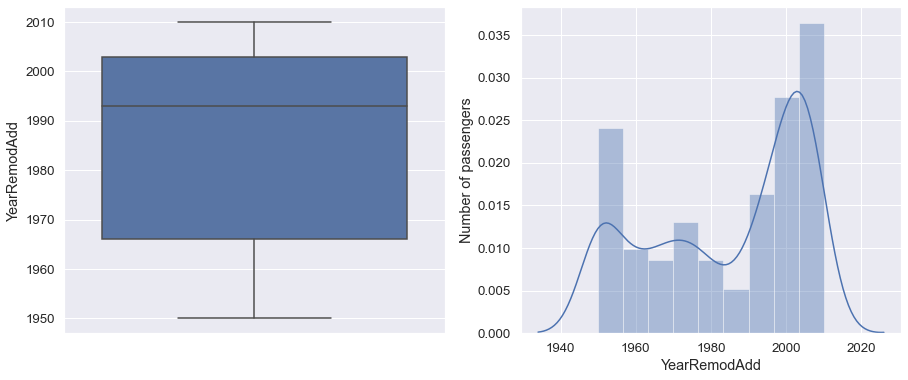

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'MasVnrArea')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'MasVnrArea')

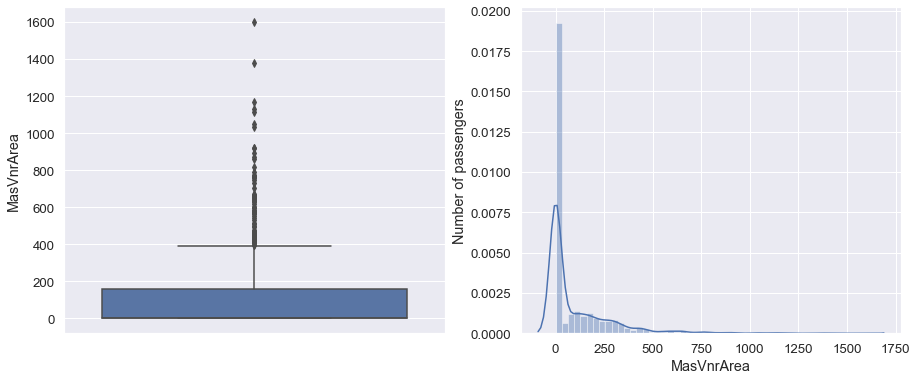

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'BsmtFinSF1')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'BsmtFinSF1')

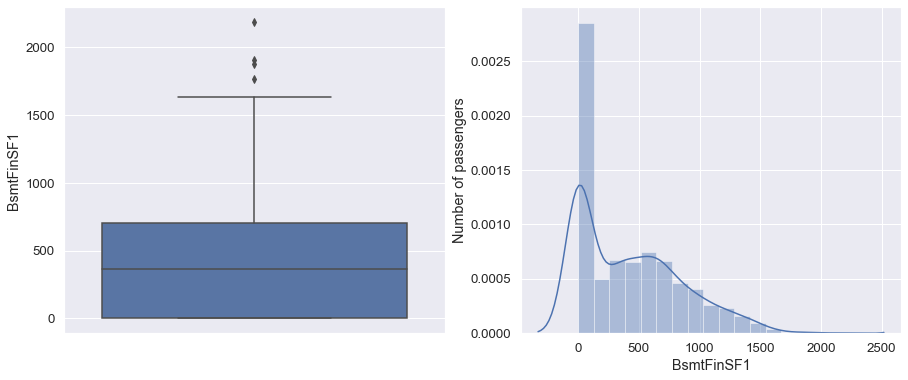

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'BsmtFinSF2')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'BsmtFinSF2')

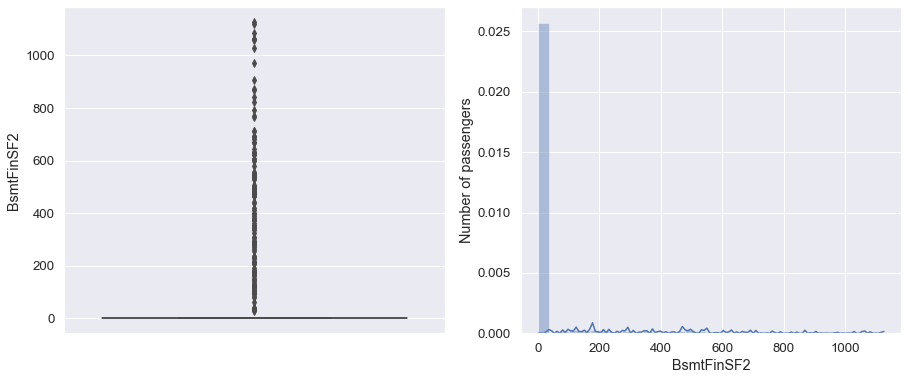

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'BsmtUnfSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'BsmtUnfSF')

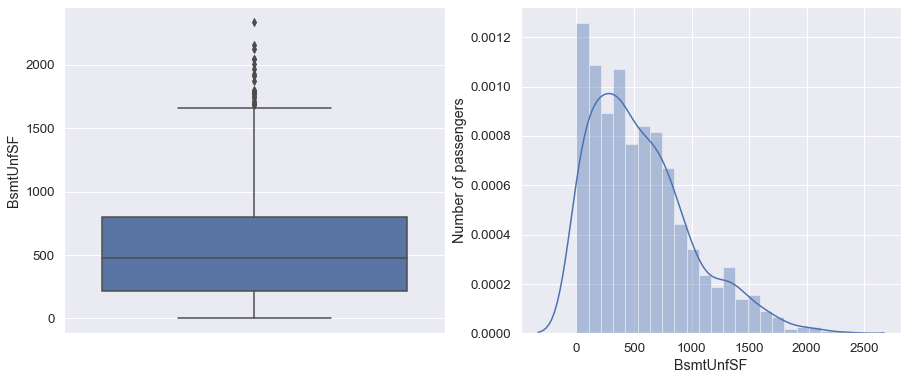

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'TotalBsmtSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'TotalBsmtSF')

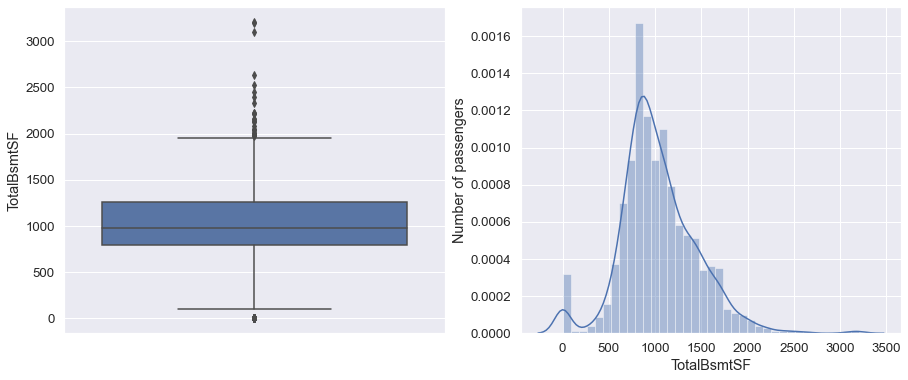

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, '1stFlrSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, '1stFlrSF')

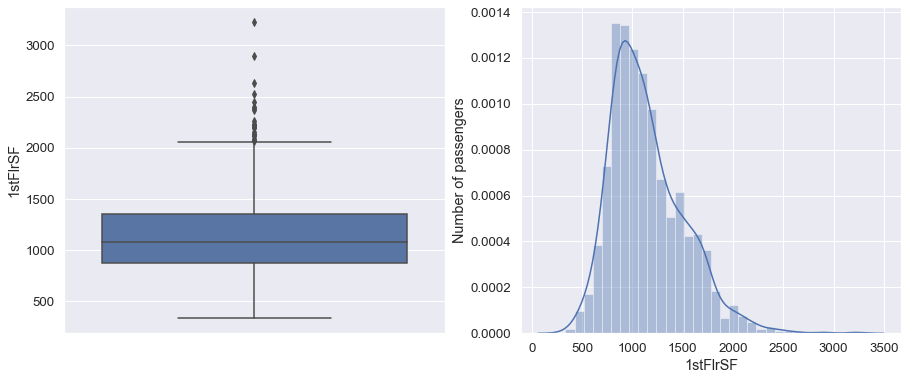

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, '2ndFlrSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, '2ndFlrSF')

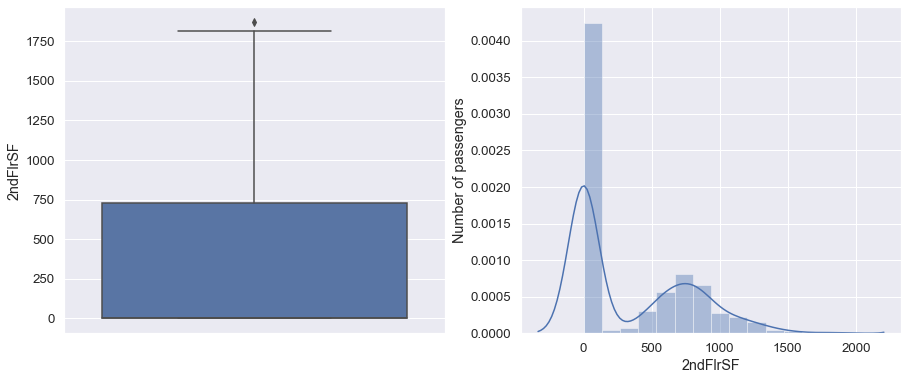

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'LowQualFinSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'LowQualFinSF')

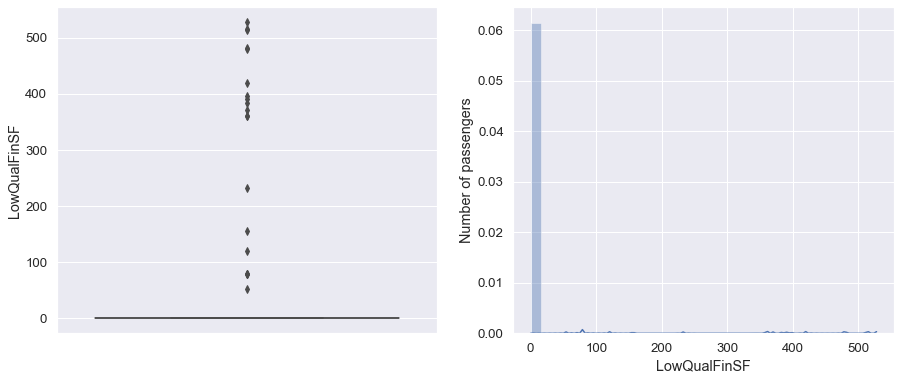

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'GrLivArea')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'GrLivArea')

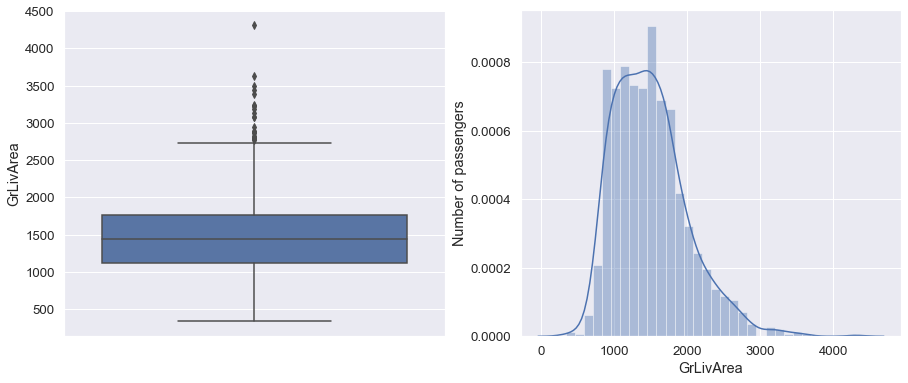

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'GarageYrBlt')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'GarageYrBlt')

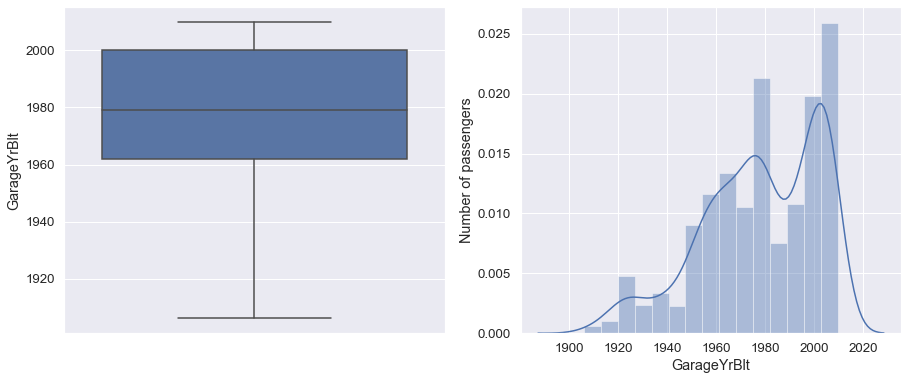

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'GarageArea')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'GarageArea')

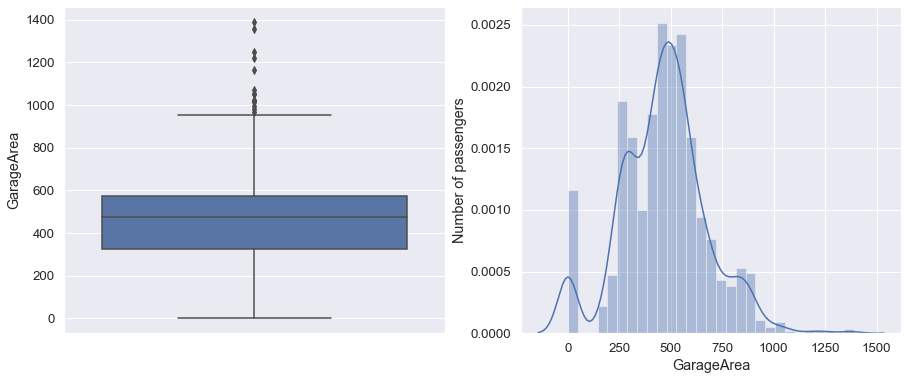

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'WoodDeckSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'WoodDeckSF')

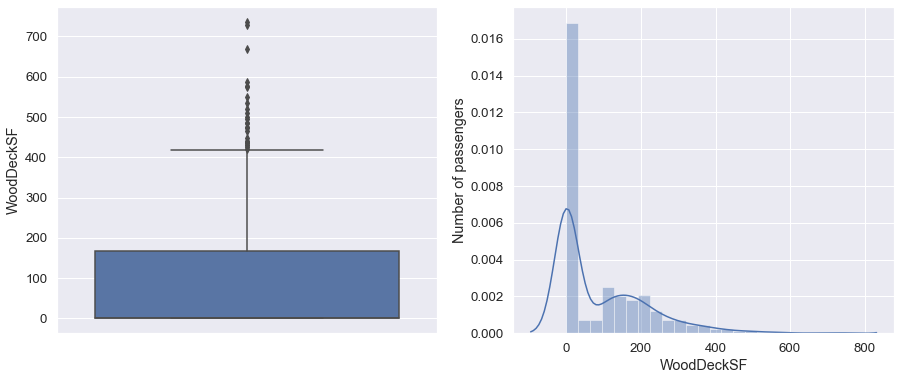

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'OpenPorchSF')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'OpenPorchSF')

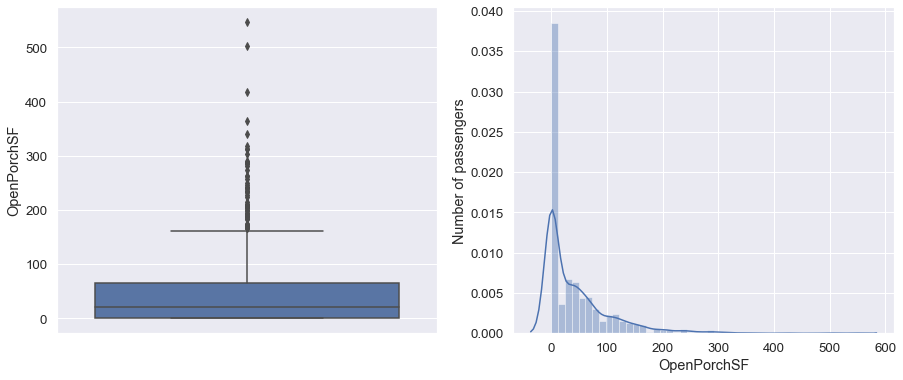

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'EnclosedPorch')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'EnclosedPorch')

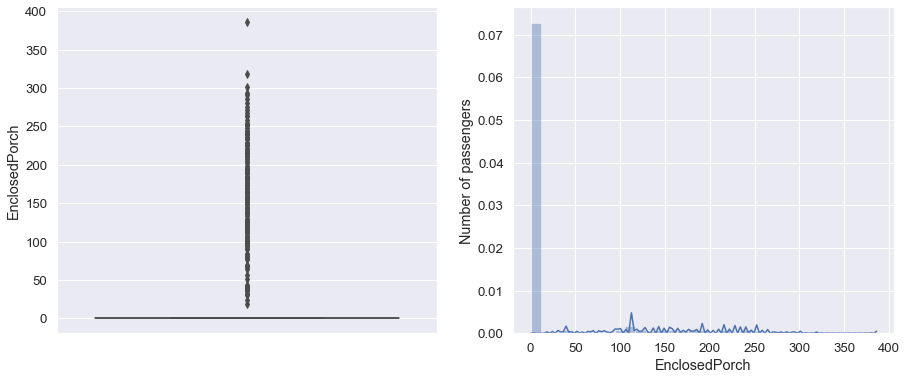

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, '3SsnPorch')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, '3SsnPorch')

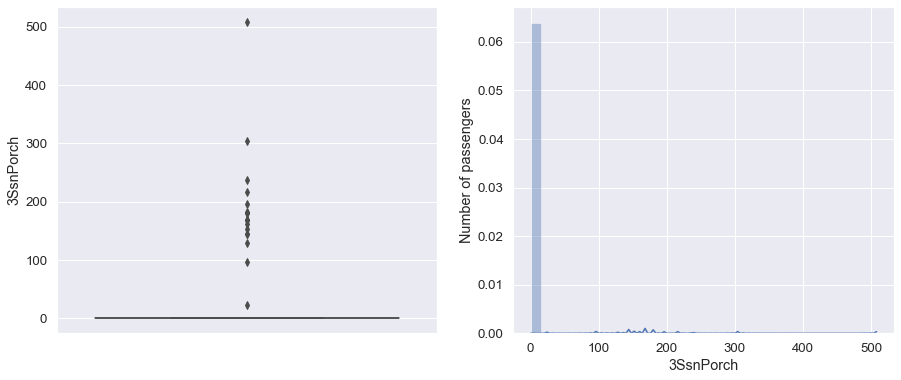

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'ScreenPorch')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'ScreenPorch')

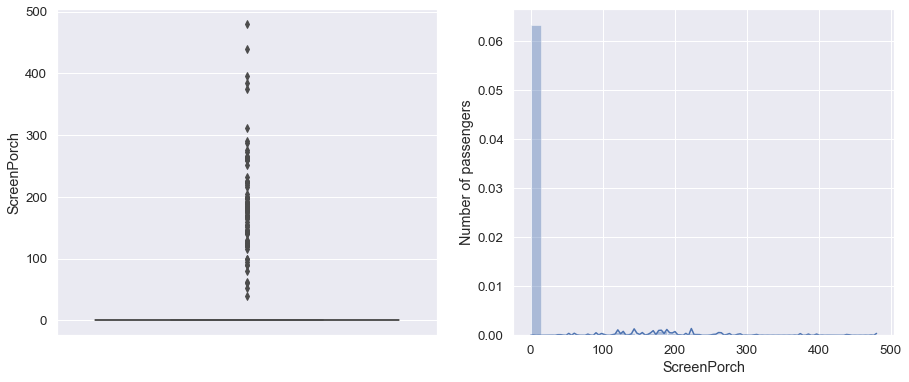

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'MiscVal')

<AxesSubplot:>

Text(0, 0.5, 'Number of passengers')

Text(0.5, 0, 'MiscVal')

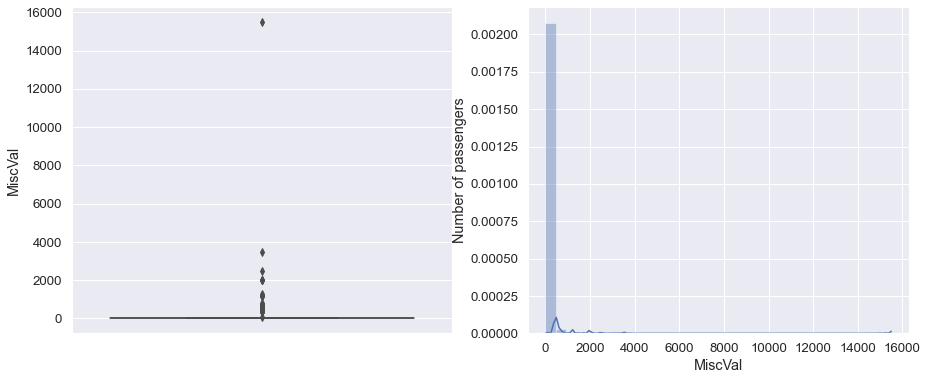

In [85]:
# Visualizing new Transformed Distribution (ideally should resemble Gaussian distribution after transformation)
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=X_train[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(X_train[var].dropna())#.hist(bins=20)
    fig.set_ylabel('Number of passengers')
    fig.set_xlabel(var)

    plt.show()

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '')

Text(0, 0.5, 'SalePrice')

<AxesSubplot:>

Text(0, 0.5, 'Number')

Text(0.5, 0, 'SalePrice')

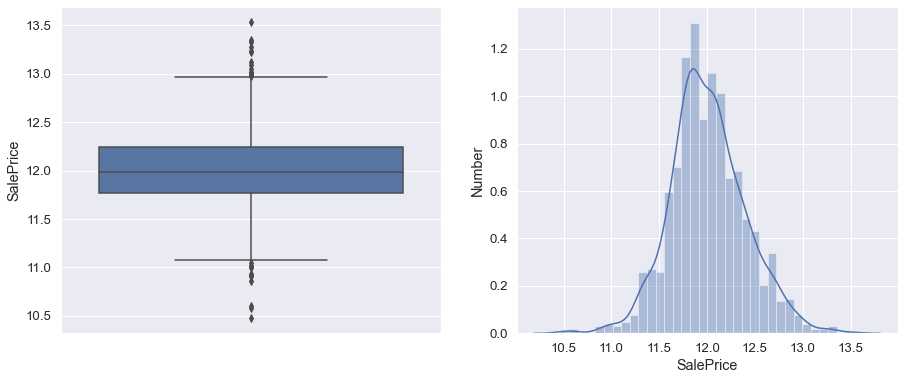

In [86]:
# Removing Skewness - Log Transforming  the target variable SalePrice

var = 'SalePrice'
y_train = np.log(y_train) 
y_test = np.log(y_test) 

# Plotting the target variable distribution 

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=y_train)
fig.set_title('')
fig.set_ylabel(var)

plt.subplot(1, 2, 2)
fig = sns.distplot(y_train)#.hist(bins=20)
fig.set_ylabel('Number')
fig.set_xlabel(var)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


()

('Skewness : ', 1.1183886475301816)

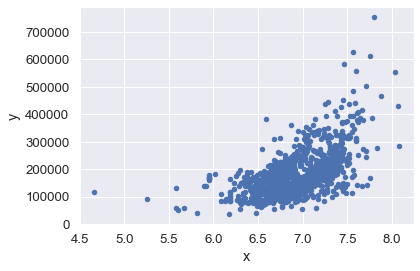

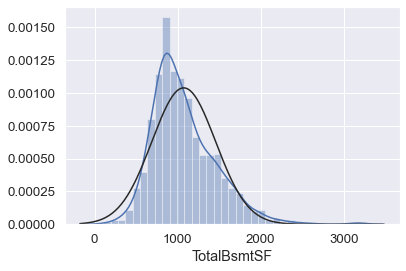

In [87]:
#replace the TotalBsmtSF = 0 with the relative GrLivArea value of that house, it will improve our skewness

houses_with_no_bsmnt_index = X_train[X_train['TotalBsmtSF']== 0].index
X_train['TotalBsmtSF'].loc[houses_with_no_bsmnt_index] = X_train['GrLivArea'].loc[houses_with_no_bsmnt_index]

getScatterPlot(np.log1p(X_train["TotalBsmtSF"]),X_train["SalePrice"])

getDistSkew(X_train,"TotalBsmtSF")


('Skewness : ', 2.0693163677053663)

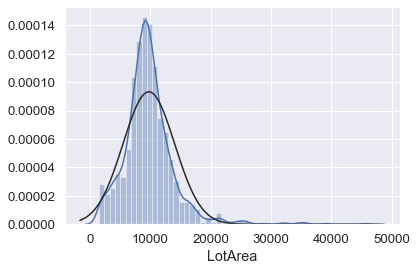

In [88]:
getDistSkew(X_train,'LotArea')

As we can see its right skewed

('Skewness : ', -0.9736225990281061)

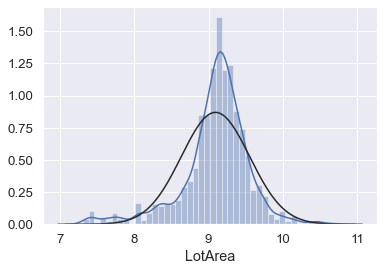

In [89]:
# Log transformation of LotArea
X_train['LotArea']=np.log1p(X_train['LotArea'])
getDistSkew(X_train,'LotArea')

In [90]:
# Here we are creating some new features out of the features available to us.
print("train dim:",X_train.shape)
X_train["TotBsmtFin"] = X_train["BsmtFinSF1"] + X_train["BsmtFinSF2"]
X_train["TotalBath"] = X_train["FullBath"] + 0.5*X_train["HalfBath"] + X_train["BsmtFullBath"] + 0.5*X_train["BsmtHalfBath"]
X_train["TotalArea"] = X_train["GrLivArea"] + X_train["TotalBsmtSF"]
X_train["FirePlacePresent"] =X_train["Fireplaces"]>0 
X_train["WoodDeckPresent "] =X_train["WoodDeckSF"]>0 


print("train dim:",X_train.shape)

train dim: (1152, 86)
train dim: (1152, 91)


#### Encoding Categorical Variables

In [91]:
# Treating unfrequent (less than 3%) labels in categorical variables
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
  
for var in categorical: 
    rare_imputation(var)

In [92]:
# Encode categorical variables - order the labels according to the target (Sales Price)
def encode_categorical_variables(var, target):
        # make label to house price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().sort_values().index
        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
        print(ordered_labels)
        # encode variables
        X_train[var] = X_train[var].map(ordinal_label)
        X_test[var] = X_test[var].map(ordinal_label)
       # submission[var] = submission[var].map(ordinal_label)

# encode labels in categorical vars
print(categorical)
for var in categorical:
    encode_categorical_variables(var, 'SalePrice')

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Index(['Rare', 'RM', 'RL', 'FV'], dtype='object', name='MSZoning')
Index(['Rare', 'Pave'], dtype='object', name='Street')
Index(['Grvl', 'Pave', 'Missing'], dtype='object', name='Alley')
Index(['Reg', 'IR1', 'Rare'], dtype='object', name='LotShape')
Index(['Bnk', 'Lvl', 'Rare'], dtype='object', name='LandContour')
Index(['Rare', 'AllPub'], dtype='object', name='Utilities')
Index(['Inside', 'FR2', 'Corner', 'Rare', 'C

In [93]:
# we will drop some features which we know are not useful from EDA
X_train = X_train.drop('Condition2',1)
X_train = X_train.drop("2ndFlrSF",1)
X_train = X_train.drop("BsmtFinType1",1)
X_train = X_train.drop("BedroomAbvGr",1)
X_train = X_train.drop("3SsnPorch",1)


In [94]:
X_train.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
521    522          20         2         90.0  9.391745       1      2   
491    492          50         2         79.0  9.158099       1      2   
1063  1064          30         1         50.0  8.699681       1      2   
680    681         120         2         50.0  8.988821       1      2   
1256  1257          20         2         91.0  9.568294       1      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
521          1            1          1          2          1             4   
491          0            1          1          0          1             4   
1063         0            1          1          0          1             2   
680          0            1          1          0          1             6   
1256         1            1          1          2          1            10   

      Condition1  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
521            0         2           3            6            6       1957   
491            1         2           1            6            7       1941   
1063           1         2           3            6            6       1925   
680            2         3           3            6            5       1980   
1256           2         2           3            8            5       1994   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
521           1957          0         0            6            5           1   
491           1950          0         0            0            0           1   
1063          1980          0         0            2            1           1   
680           1980          0         0            4            3           1   
1256          1994          2         0            3            4           2   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
521          0.0          1          2           2         1         2   
491          0.0          1          2           2         1         2   
1063         0.0          1          1           1         1         2   
680          0.0          1          2           2         2         2   
1256       554.0          2          2           3         2         2   

      BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
521              1         777             3           0        467   
491              1         403             1         165        238   
1063             1         397             3           0        706   
680              1         543             0         119        261   
1256             4        1314             3           0        672   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
521          1244        1          4           1           1      1244   
491           806        1          2           1           1       958   
1063         1103        1          3           1           2      1103   
680           923        1          2           1           2       923   
1256         1986        1          4           1           2      1987   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
521              0       1244             0             0         1         1   
491              0       1578             1             0         1         0   
1063             0       1103             0             0         1         0   
680              0        923             0             0         2         0   
1256             0       1987             1             0         2         0   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
521              1            1             6           1           2   
491              1            0             5           1           2   
1063             1            2             5           1           1   
680              1            

#### Feature Scaling - Normalization

In [95]:
training_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]
# fit scaler
scaler = StandardScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set for later use

StandardScaler()

### 

From Here on we can start using different Machine Learning Algorithms to fit our data and tune parameters to get the best result or we can use also try out the hybrid models to get the better performance.

As we know this is not a classification task(from our target variable) and we will be using regression techniques to build our model.
Some models that we can use:
1. DecisionTreeRegressor
2. RandomForestRegressor
3. XGBoost
4. LightGBM